In [17]:
import sys
!{sys.executable} -m pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_15_x86_64.whl size=160316 sha256=5f994285342d96d548d6c0f70e5f5a922d0c888fd301e182365ab2bf39e9a6e3
  Stored in directory: /Users/binayprasannajena/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [18]:
import numpy as np 
import pandas as pd
# data structures and operations for manipulating numerical tables and time series
import matplotlib.pyplot as plt
# plotting
import plotly.express as px
# graph
import plotly.graph_objects as go
# graph
import seaborn as sns
# t-test
from scipy import stats
# regression
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Word Cloud
from wordcloud import WordCloud

In [19]:
data=pd.read_csv('DataAnalyst.csv')

In [20]:
data.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


In [21]:
data.describe(include='all')

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253.0000,2253,2253,2253,2253.000000,2252,2253,2253,2253,2253.000000,2253,2253,2253,2253,2253,2253
unique,NaN,1272,90,2253,NaN,1513,253,483,9,NaN,15,89,25,14,291,2
top,NaN,Data Analyst,$42K-$76K (Glassdoor est.),Square builds common business tools in unconve...,NaN,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,NaN,405,57,1,NaN,58,310,206,421,NaN,1273,353,570,615,1732,2173
mean,1126.0000,NaN,NaN,NaN,3.160630,NaN,NaN,NaN,NaN,1398.522858,NaN,NaN,NaN,NaN,NaN,NaN
std,650.5294,NaN,NaN,NaN,1.665228,NaN,NaN,NaN,NaN,901.929251,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,563.0000,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1126.0000,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1689.0000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleansing

In [22]:
# Check for missing values
def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()
    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)
    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1) 
    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0:'Missing Values',1:'% of Total Values'})
    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values(
        '% of Total Values',ascending=False).round(1) #Review
    print("Your selected datset has "+str(df.shape[1])+" columns and "+str(len(df))+" observations.\n"
         "There are "+str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(data)

Your selected datset has 16 columns and 2253 observations.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Company Name,1,0.0


In [23]:
data['Easy Apply'].value_counts()

-1      2173
True      80
Name: Easy Apply, dtype: int64

In [24]:
data['Competitors'].value_counts()

-1                                                      1732
Robert Half, Insight Global                               14
Adecco, Manpower                                          14
TEKsystems, Insight Global, Accenture                     10
Artech Information Systems, Mindlance, Tech Mahindra      10
                                                        ... 
Attain, Deloitte, Booz Allen Hamilton                      1
TEKsystems, CGI, SDLC Partners                             1
Fiserv, First Data, Jack Henry & Associates                1
Bloomreach                                                 1
Intercontinental Exchange, Euronext, Nasdaq                1
Name: Competitors, Length: 291, dtype: int64

we see values -1, '-1.0' , '-1'. these are garbage /null kind of values. we need to clean these up too

In [27]:
# Replace -1 or -1.0 or '-1' to NaN
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

let's now check missing values again

In [28]:
missing_values_table(data)

Your selected datset has 16 columns and 2253 observations.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Easy Apply,2173,96.4
Competitors,1732,76.9
Founded,660,29.3
Industry,353,15.7
Sector,353,15.7
Rating,272,12.1
Headquarters,172,7.6
Size,163,7.2
Type of ownership,163,7.2
Revenue,163,7.2


we see now there are more missing value columns than before. most positoons don't suport "Easy Apply" function. competitor info is missing for many.. and so on...

In [30]:
#Remove '\n' from Company Name. 
data['Company Name'].str.split('\n', 1).str=data['Company Name'].str.split('\n', 1).str
# 1st column after split, 2nd column after split (delete when '_')
# string.split(separator, maxsplit) maxsplit default -1, which means all occurrances

In [36]:
# Split salary into two columns min salary and max salary.
data['Salary Estimate'].str.split('(', 1).str=data['Salary Estimate'].str.split('(', 1).str

In [44]:
# Split salary into two columns min salary and max salary.
data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str
#data['Min_Salary']=data['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
#data['Max_Salary']=data['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
# lstrip is for removing leading characters
# rstrip is for removing rear characters

<ipython-input-44-30d2d575599d>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str


In [46]:
data['Min_Salary']=data['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

In [47]:
data['Max_Salary']=data['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

In [48]:
data['Min_Salary']

0       37
1       37
2       37
3       37
4       37
        ..
2248    78
2249    78
2250    78
2251    78
2252    78
Name: Min_Salary, Length: 2253, dtype: int64

In [49]:
data['Max_Salary']

0        66
1        66
2        66
3        66
4        66
       ... 
2248    104
2249    104
2250    104
2251    104
2252    104
Name: Max_Salary, Length: 2253, dtype: int64

In [50]:
#Drop the original Salary Estimate column
data.drop(['Salary Estimate'],axis=1,inplace=True)

In [51]:
# To estimate the salary with regression and other analysis, better come up with one number: Est_Salary = (Min_Salary+Max_Salary)/2
data['Est_Salary']=(data['Min_Salary']+data['Max_Salary'])/2

In [52]:
# Create a variable for how many years a firm has been founded
data['Years_Founded'] = 2020 - data['Founded']

In [53]:
# let's take final look at data before analysis
data.head(2)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary,Est_Salary,Years_Founded
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37,66,51.5,59.0
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37,66,51.5,127.0


## Exploratory Analysis

### Salary Distribution of All Data Analysts

<Figure size 936x360 with 0 Axes>

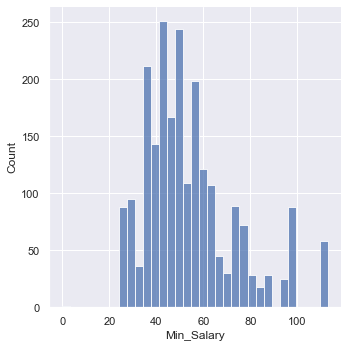

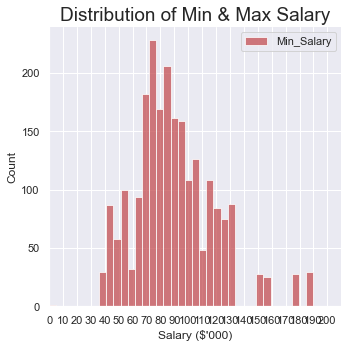

In [55]:
plt.figure(figsize=(13,5))
sns.set() #style==background
sns.displot(data['Min_Salary'], color="b")
sns.displot(data['Max_Salary'], color="r")

plt.xlabel("Salary ($'000)")
plt.legend({'Min_Salary':data['Min_Salary'],'Max_Salary':data['Max_Salary']})
plt.title("Distribution of Min & Max Salary",fontsize=19)
plt.xlim(0,210)
plt.xticks(np.arange(0, 210, step=10))
plt.tight_layout()
plt.show()

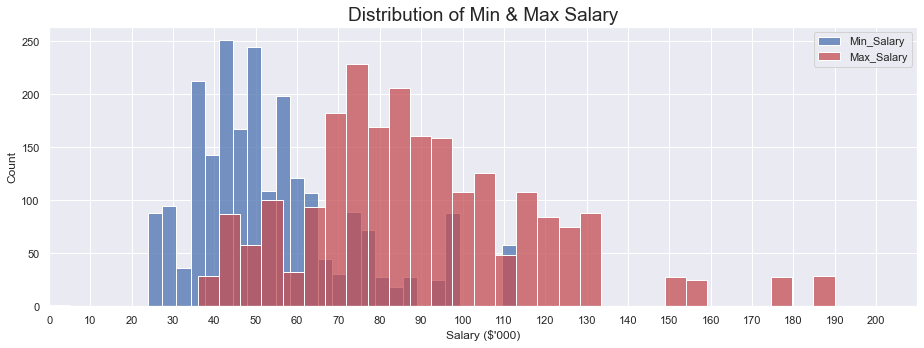

In [56]:
plt.figure(figsize=(13,5))
sns.set() #style==background
sns.histplot(data['Min_Salary'], color="b")
sns.histplot(data['Max_Salary'], color="r")

plt.xlabel("Salary ($'000)")
plt.legend({'Min_Salary':data['Min_Salary'],'Max_Salary':data['Max_Salary']})
plt.title("Distribution of Min & Max Salary",fontsize=19)
plt.xlim(0,210)
plt.xticks(np.arange(0, 210, step=10))
plt.tight_layout()
plt.show()

* Based on the modes of distribution, minimum salary is 45k and maximum is 75k

* however the spread is more incase of max_salary (it has a longer tail)

In [57]:
min_max_view = data.sort_values(['Min_Salary','Max_Salary'],ascending=True).reset_index(drop=True).reset_index()
min_max_view = min_max_view.drop([0])

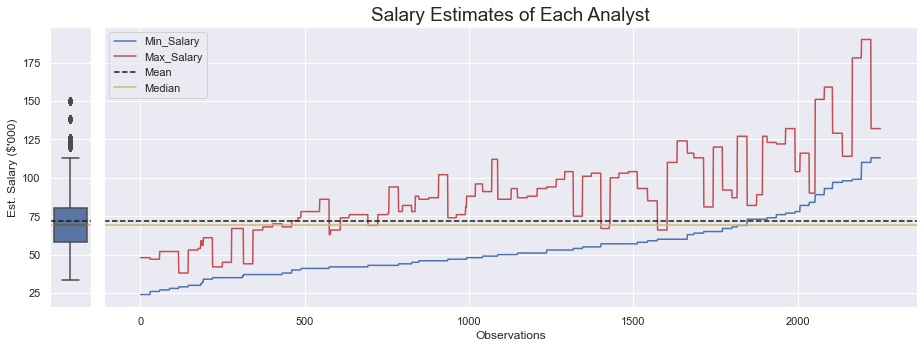

In [58]:
f, (ax_box, ax_line) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios": (0.05,1)},figsize=(13,5))
mean=min_max_view['Est_Salary'].mean()
median=min_max_view['Est_Salary'].median()

bpv = sns.boxplot(y='Est_Salary',data=min_max_view, ax=ax_box).set(ylabel="Est. Salary ($'000)")
ax_box.axhline(mean, color='k', linestyle='--')
ax_box.axhline(median, color='y', linestyle='-')

lp1 = sns.lineplot(x='index',y='Min_Salary',data=min_max_view, color='b')
lp2 = sns.lineplot(x='index',y='Max_Salary',ax=ax_line,data=min_max_view, color='r')
ax_line.axhline(mean, color='k', linestyle='--')
ax_line.axhline(median, color='y', linestyle='-')

plt.legend({'Min_Salary':data['Min_Salary'],'Max_Salary':data['Max_Salary'],'Mean':mean,'Median':median})
plt.title("Salary Estimates of Each Analyst",fontsize=19)
plt.xlabel("Observations")
plt.tight_layout()
plt.show()

if we see anther view of dalasry distribution min, max and median

* x-axis : id (index) of all observations sorted by ascending salary min

* the min-max range estimates are more stable (flatter gradient) when min_salary ranges from 37K-50K

* salary estimates beyond 112K are outliers

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


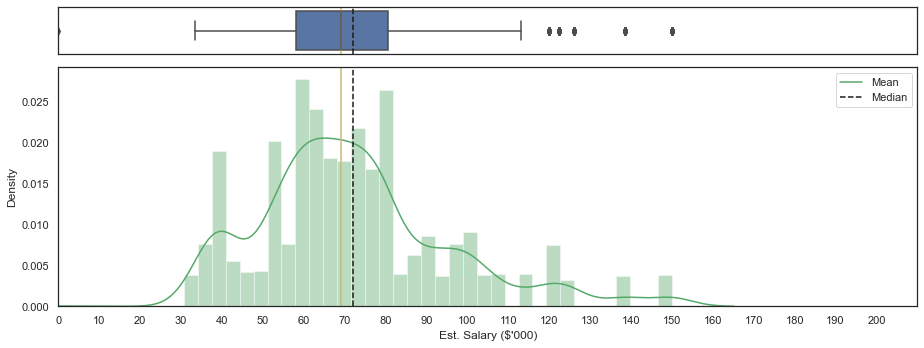

In [59]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Est_Salary'].mean()
median=data['Est_Salary'].median()

bph = sns.boxplot(data['Est_Salary'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.distplot(data['Est_Salary'],ax=ax_hist, color="g").set(xlabel="Est. Salary ($'000)")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,210)
plt.xticks(np.arange(0,210,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


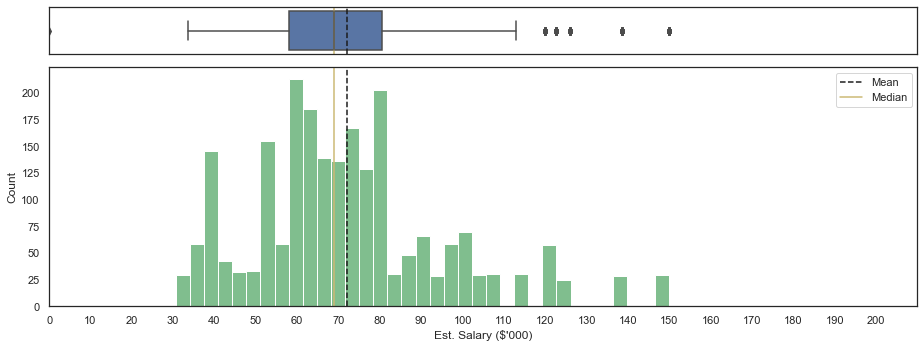

In [60]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Est_Salary'].mean()
median=data['Est_Salary'].median()

bph = sns.boxplot(data['Est_Salary'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.histplot(data['Est_Salary'],ax=ax_hist, color="g").set(xlabel="Est. Salary ($'000)")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,210)
plt.xticks(np.arange(0,210,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

disregarding min and max, focus on Est Salary. both mean and median are ~70K

### Distribution of Company Maturity /Ages

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


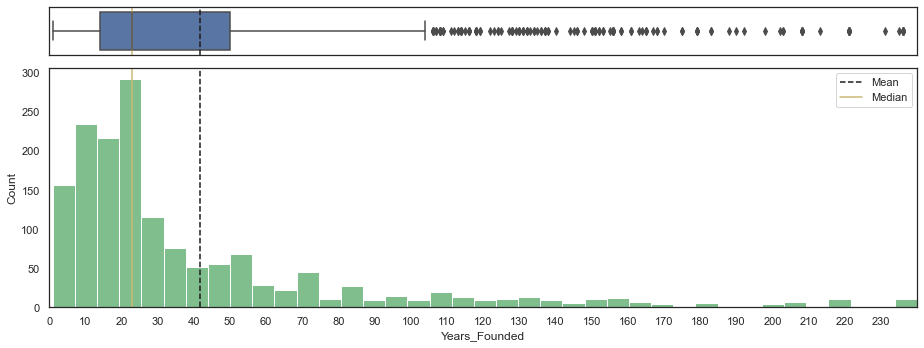

In [62]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Years_Founded'].mean()
median=data['Years_Founded'].median()

bph = sns.boxplot(data['Years_Founded'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.histplot(data['Years_Founded'],ax=ax_hist, color="g").set(xlabel="Years_Founded")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,240)
plt.xticks(np.arange(0,240,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

### Distribution of Company Ratings

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


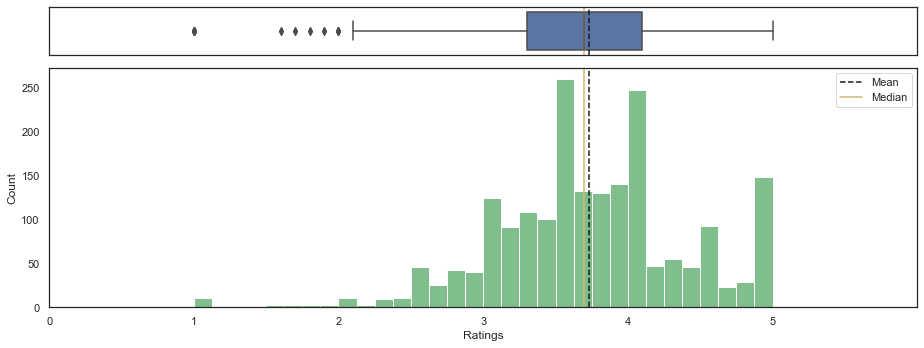

In [64]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Rating'].mean()
median=data['Rating'].median()

bph = sns.boxplot(data['Rating'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.histplot(data['Rating'],ax=ax_hist, color="g").set(xlabel="Ratings")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,6)
plt.xticks(np.arange(0,6,step=1))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


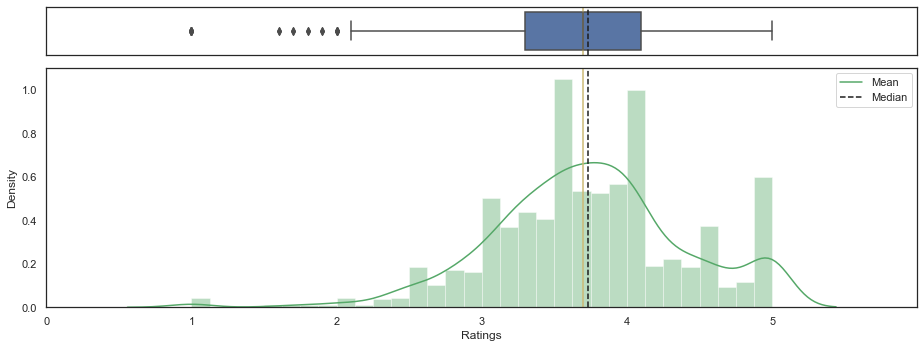

In [65]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Rating'].mean()
median=data['Rating'].median()

bph = sns.boxplot(data['Rating'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp = sns.distplot(data['Rating'],ax=ax_hist, color="g").set(xlabel="Ratings")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
plt.xlim(0,6)
plt.xticks(np.arange(0,6,step=1))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

### Top 20 Hiring and Salary Estimates by Firms 

First step is knowing the companies that are actively hiring Data Analysts and the salry estimates being offered

In [66]:
# First I count the positions opened by the companies.
df_by_firm=data.groupby('Company Name')['Job Title'].count().reset_index().sort_values(
    'Job Title',ascending=False).head(20).rename(columns={'Job Title':'Hires'})
# When we reset the index, the old index is added as a column, and a new sequential index is used

In [67]:
# Merge with original data to get salary estimates.
Sal_by_firm = df_by_firm.merge(data,on='Company Name',how='left')

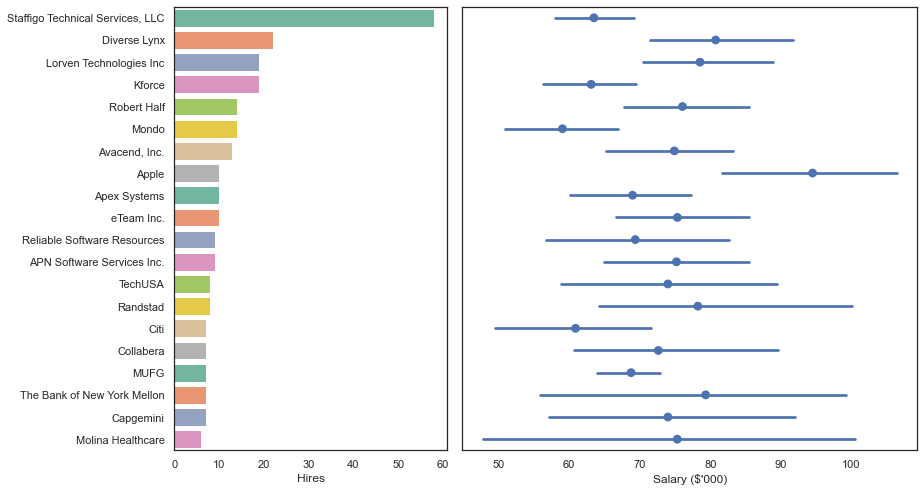

In [68]:
sns.set(style="white")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Company Name',data=Sal_by_firm,ax=ax_bar, palette='Set2').set(ylabel="")
sns.pointplot(x='Est_Salary',y='Company Name',data=Sal_by_firm, join=False,ax=ax_point).set(
    ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* staffigo was hiring the most number of analysts but with 4th lowest est. salary

* apple has the highest est salary but the variance is large

* most sample sizes are smaller than 30, we we can assume sampling bias (and be conservative) about salary est. by firms

### Top 20 Hires and Salary Estimates by Job Location Cities

In [69]:
df_by_city=data.groupby('Location')['Job Title'].count().reset_index().sort_values(
    'Job Title',ascending=False).head(20).rename(columns={'Job Title':'Hires'})
Sal_by_city = df_by_city.merge(data,on='Location',how='left')

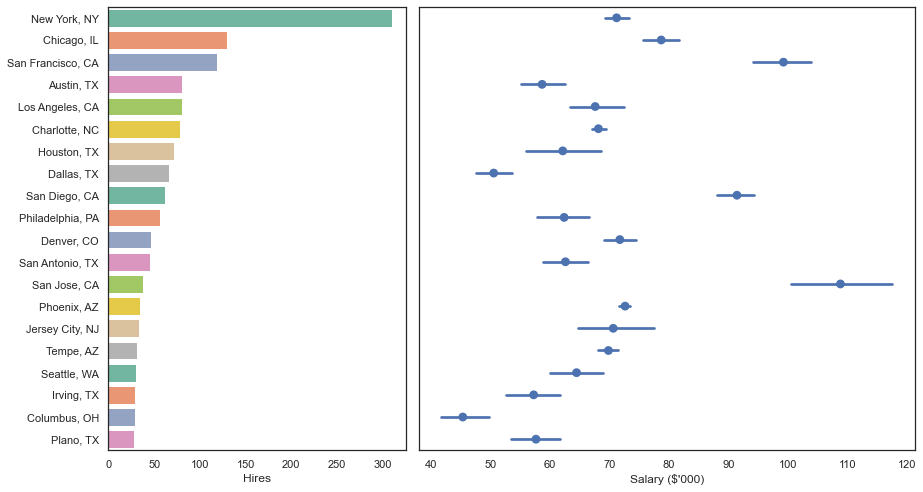

In [70]:
sns.set(style="white")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Location',data=Sal_by_city,ax=ax_bar, palette='Set2').set(ylabel="")
sns.pointplot(x='Est_Salary',y='Location',data=Sal_by_city, join=False,ax=ax_point).set(
    ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* New York was hiring the most analysts with est salary at 70K

* San Jose, CA has the highest est salary and the largest variance

### Hires and Salary Estimates by Job Location States

In [71]:
data['City'],data['State'] = data['Location'].str.split(', ',1).str

<ipython-input-71-ed103ea9ac18>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['City'],data['State'] = data['Location'].str.split(', ',1).str


In [72]:
data['City']

0         New York
1         New York
2         New York
3         New York
4         New York
           ...    
2248        Denver
2249    Centennial
2250        Denver
2251    Centennial
2252    Broomfield
Name: City, Length: 2253, dtype: object

In [73]:
data['State']

0       NY
1       NY
2       NY
3       NY
4       NY
        ..
2248    CO
2249    CO
2250    CO
2251    CO
2252    CO
Name: State, Length: 2253, dtype: object

In [74]:
data['State']=data['State'].replace('Arapahoe, CO','CO')

In [75]:
stateCount = data.groupby('State')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
stateCount = stateCount.merge(data, on='State',how='left')

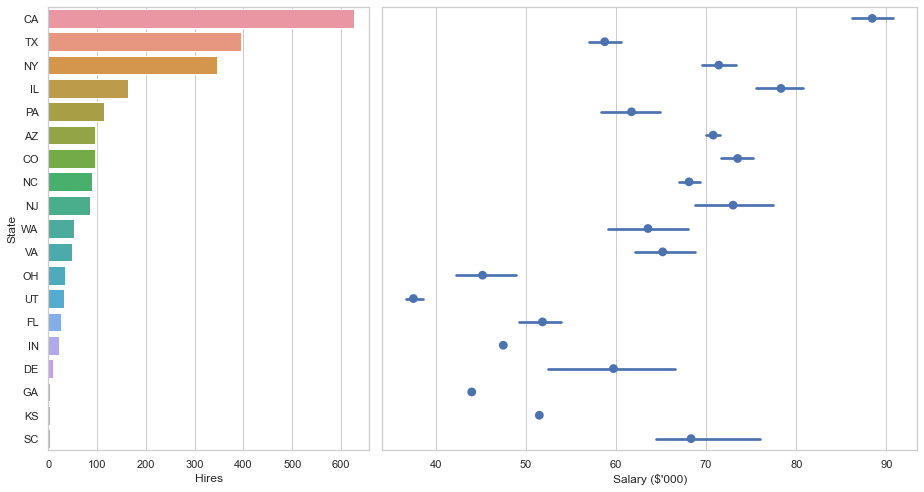

In [76]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='State',data=stateCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='State',data=stateCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* when viewing by states, positive correlation is more evident between demand and analysts' salaries. CA companies seem to have highest demand and are most generous with analyst hires

### Top 20 Hires and Salary Estimates by Headquarters Location

In [77]:
data['HQCity'],data['HQState'] = data['Headquarters'].str.split(', ',1).str

<ipython-input-77-83593a28bd6d>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['HQCity'],data['HQState'] = data['Headquarters'].str.split(', ',1).str


In [78]:
data['HQState']=data['HQState'].replace('NY (US), NY','NY')

In [79]:
HQCount = data.groupby('HQState')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).head(20).reset_index(drop=True)
HQCount = HQCount.merge(data, on='HQState',how='left')

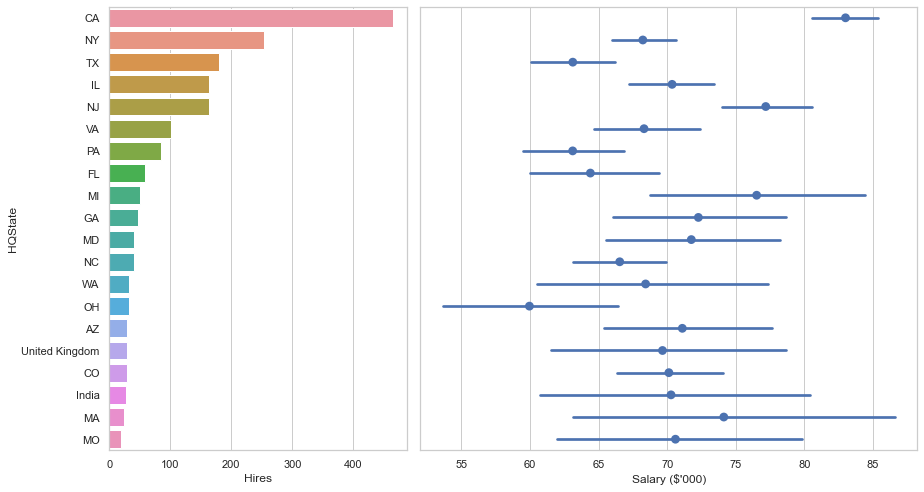

In [80]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='HQState',data=HQCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='HQState',data=HQCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* salary variance is higher in headquarter locations thyan job locations, this possibly refers to additonal factors contributing to these variations. we will dig in the regression model

### Est Salary and Hires by Revenue

In [81]:
RevCount = data.groupby('Revenue')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)

In [82]:
#Make the Revenue column clean
RevCount["Revenue_USD"]=['Unknown','100-500 million','50-100 million','10+ billion','10-25 million','2-5 billion','1-5 million','25-50 million','<1 million','1-2 billion','0.5-1 billion','5-10 million','5-10 billion']
#Merge the new Revenue back to data
RevCount2 = RevCount[['Revenue','Revenue_USD']]
RevCount = RevCount.merge(data, on='Revenue',how='left')

In [83]:
data=data.merge(RevCount2,on='Revenue',how='left')

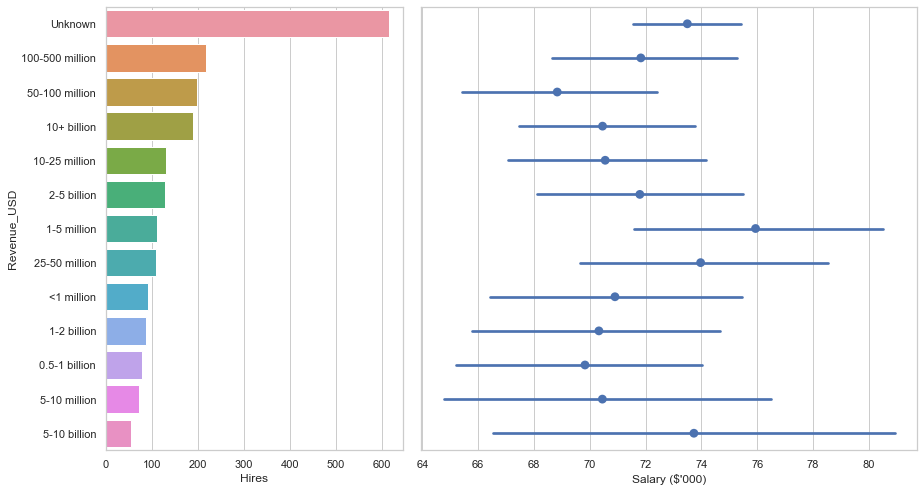

In [84]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Revenue_USD',data=RevCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Revenue_USD',data=RevCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* this seems to suggest that there isnt much differentiation with analyst salary amongst big firms, in fact they do not seem to pay more for small and medium businesses for analysts

### Hires and Salary Estimates by Size

In [85]:
SizeCount = data.groupby('Size')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
SizeCount = SizeCount.merge(data, on='Size',how='left')

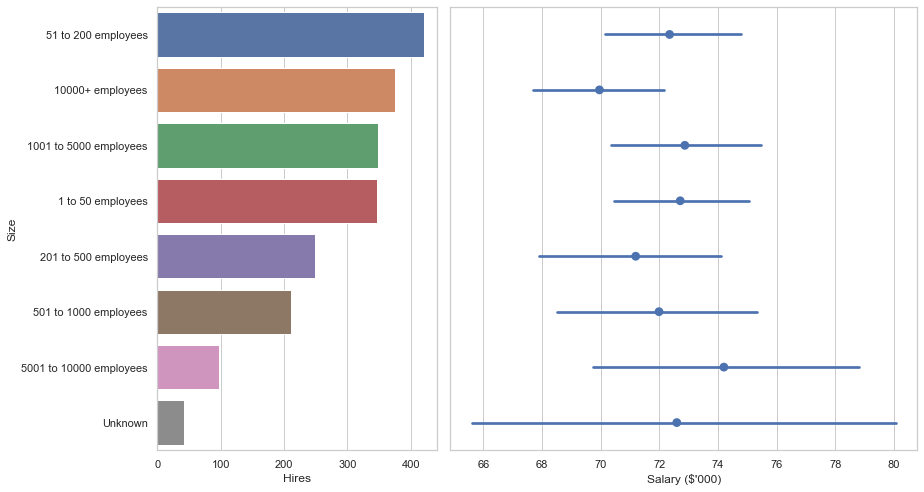

In [86]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Size',data=SizeCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Size',data=SizeCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* bigger firms don't necessarily pay higher salaries

### Top 12 Salary Estimates and Hiring Sectoral Trends

In [87]:
SecCount = data.groupby('Sector')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
SecCount = SecCount.merge(data, on='Sector',how='left')
SecCount = SecCount[SecCount['Hires']>29]

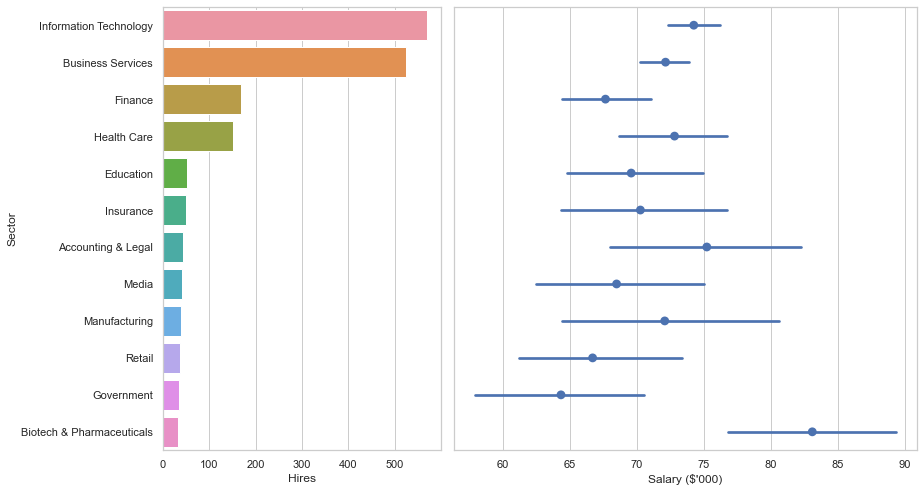

In [88]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Sector',data=SecCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Sector',data=SecCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

### Hiring and Salary Estimates by Ownership Type

In [89]:
OwnCount = data.groupby('Type of ownership')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Hires'}).sort_values(
    'Hires', ascending=False).reset_index(drop=True)
OwnCount = OwnCount.merge(data, on='Type of ownership',how='left')


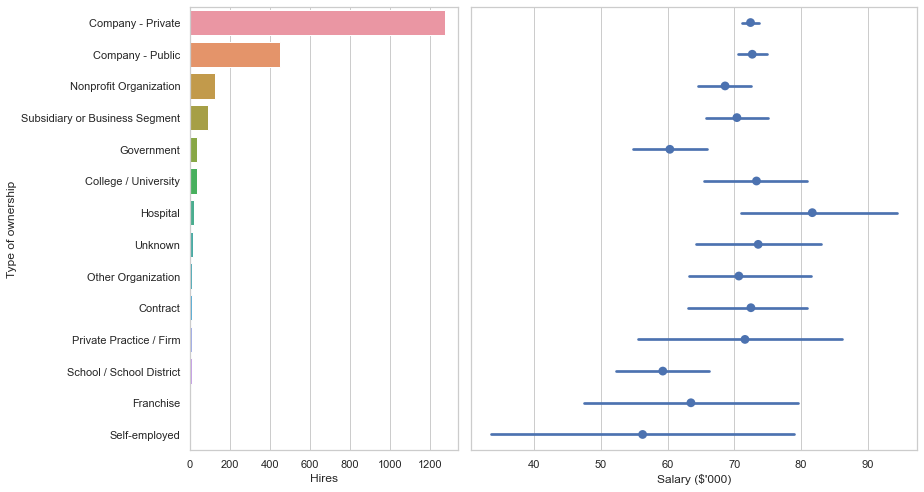

In [90]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Hires',y='Type of ownership',data=OwnCount,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Type of ownership',data=OwnCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* demand is higher in private firms and salries are comparable with public firms

### Hiring and Salary Estimates by Job Titles

need to do bit of data cleansing/rearranging to get this done

In [92]:
# create a new dataset from original data
text_Analysis = data[['Job Title','Job Description','Est_Salary','Max_Salary','Min_Salary','State','Easy Apply','Revenue_USD','Rating','Size','Industry','Sector','Type of ownership','Years_Founded','Company Name','HQState']]

In [93]:
# remove special characters and unify some word use
text_Analysis['Job_title_2']= text_Analysis['Job Title'].str.upper().replace(
    [',','Â','/','\t','\n','-','AND ','&','\(','\)','WITH ','SYSTEMS','OPERATIONS','ANALYTICS','SERVICES','\[','\]','ENGINEERS','NETWORKS','GAMES','MUSICS','INSIGHTS','SOLUTIONS','JR.','MARKETS','STANDARDS','FINANCE','ENGINEERING','PRODUCTS','DEVELOPERS','SR. ','SR ','JR. ','JR '],
    ['','',' ',' ',' ',' ','',' ',' ',' ','','SYSTEM','OPERATION','ANALYTIC','SERVICE','','','ENGINEER','NETWORK','GAME','MUSIC','INSIGHT','SOLUTION','JUNIOR','MARKET','STANDARD','FINANCIAL','ENGINEER','PRODUCT','DEVELOPER','SENIOR ','SENIOR ','JUNIOR ','JUNIOR '],regex=True)
# later found out replace('[^A-Za-z0-9]+', ' ',regex=True) is a simpler way to remove non-text characters


<ipython-input-93-6ced5ed5643e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_Analysis['Job_title_2']= text_Analysis['Job Title'].str.upper().replace(


In [94]:
text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(
    ['  ','   ','    '],
    [' ',' ',' '],regex=True)
# later found out replace('[^A-Za-z0-9]+', ' ',regex=True) is a simpler way to remove non-text characters

<ipython-input-94-59775f7874f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(


In [95]:
# unify some word use
text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(
    ['BUSINESS INTELLIGENCE','INFORMATION TECHNOLOGY','QUALITY ASSURANCE','USER EXPERIENCE','USER INTERFACE','DATA WAREHOUSE','DATA ANALYST','DATA BASE','DATA QUALITY','DATA GOVERNANCE','BUSINESS ANALYST','DATA MANAGEMENT','REPORTING ANALYST','BUSINESS DATA','SYSTEM ANALYST','DATA REPORTING','QUALITY ANALYST'],
    ['BI','IT','QA','UX','UI','DATA_WAREHOUSE','DATA_ANALYST','DATABASE','DATA_QUALITY','DATA_GOVERNANCE','BUSINESS_ANALYST','DATA_MANAGEMENT','REPORTING_ANALYST','BUSINESS_DATA','SYSTEM_ANALYST','DATA_REPORTING','QUALITY_ANALYST'],regex=True)

<ipython-input-95-af2ddcbef9f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(


In [96]:
# unify some word use
text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(
    ['DATA_ANALYST JUNIOR','DATA_ANALYST SENIOR','DATA  REPORTING_ANALYST'],
    ['JUNIOR DATA_ANALYST','SENIOR DATA_ANALYST','DATA_REPORTING_ANALYST'],regex=True)


<ipython-input-96-e978a2cab774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_Analysis['Job_title_2']= text_Analysis['Job_title_2'].str.upper().replace(


In [97]:
jobCount=text_Analysis.groupby('Job_title_2')[['Job Title']].count().reset_index().rename(
    columns={'Job Title':'Count'}).sort_values('Count',ascending=False)
jobSalary = text_Analysis.groupby('Job_title_2')[['Max_Salary','Est_Salary','Min_Salary']].mean().sort_values(
    ['Max_Salary','Est_Salary','Min_Salary'],ascending=False)
jobSalary['Spread']=jobSalary['Max_Salary']-jobSalary['Est_Salary']
jobSalary=jobSalary.merge(jobCount,on='Job_title_2',how='left').sort_values('Count',ascending=False).head(20)

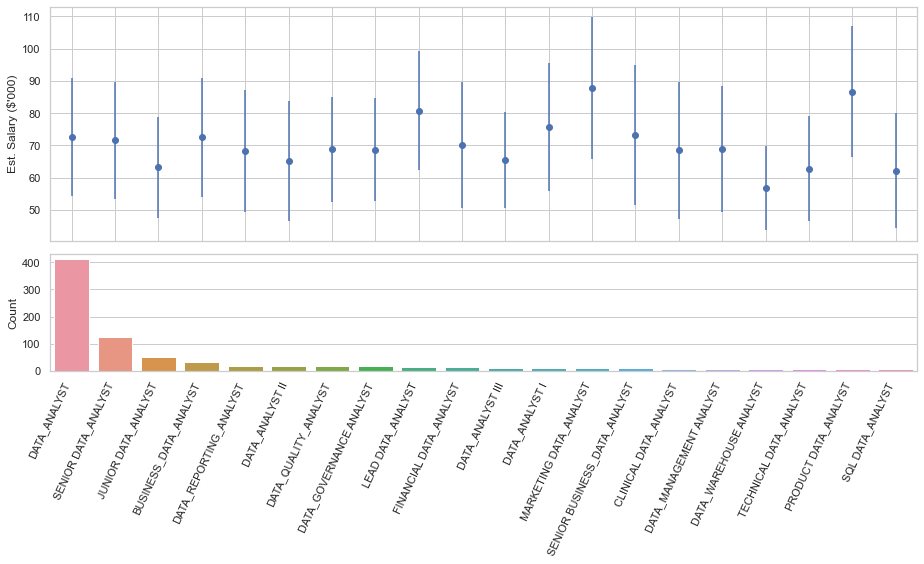

In [98]:
f, axs = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios":(1,0.5)},figsize=(13,8))

ax = axs[0]
ax.errorbar(x='Job_title_2',y='Est_Salary',data=jobSalary,yerr=jobSalary['Spread'],fmt='o')
ax.set_ylabel('Est. Salary ($\'000)')

ax = axs[1]
sns.barplot(x=jobSalary['Job_title_2'],y=jobSalary['Count']).set(xlabel="")

plt.xticks(rotation=65,horizontalalignment='right')
plt.tight_layout()

(most sample size is below 30) this doesn't seem any better conclusive -- since we have standarized role titles

#### Regression model maybe a better approach, some titles/role desc maybe correlated with salary

## Regression Analysis

### Correlation: Job Title Keywords vs Salary

In [99]:
# get top keywords
s = text_Analysis['Job_title_2'].str.split(expand=True).stack().value_counts().reset_index().rename(
    columns={'index':'KW',0:'Count'})
S = s[s['Count']>29]
S

,KW,Count
0,DATA_ANALYST,1596
1,DATA,444
2,ANALYST,422
3,SENIOR,415
4,ANALYTIC,81
5,BUSINESS_ANALYST,75
6,JUNIOR,71
7,BUSINESS_DATA_ANALYST,71
8,FINANCIAL,61
9,LEAD,60


In [100]:
# write get_keyword method
def get_keyword(x):
   x_ = x.split(" ")
   keywords = []
   try:
      for word in x_:
         if word in np.asarray(S['KW']):
            keywords.append(word)
   except:
      return -1

   return keywords

In [101]:
# get keywords from each row
text_Analysis['KW'] = text_Analysis['Job_title_2'].apply(lambda x: get_keyword(x))

<ipython-input-101-3c511b91d267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_Analysis['KW'] = text_Analysis['Job_title_2'].apply(lambda x: get_keyword(x))


In [102]:
# create dummy columns by keywords
kwdummy = pd.get_dummies(text_Analysis['KW'].apply(pd.Series).stack()).sum(level=0).replace(2,1)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True).replace(np.nan,0)

In [103]:
# drop 2149 because unpaid analyst is not usual
text_Analysis = text_Analysis.drop([2149])

In [104]:
# run t-test for top keywords to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests=[]
for word in text_columns:
    if word in set(S['KW']):
        ttest = stats.ttest_ind(text_Analysis[text_Analysis[word]==1]['Est_Salary'],
                                     text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests.append([word,ttest])
        
ttests = pd.DataFrame(ttests,columns=['KW','R'])
ttests['R']=ttests['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests['Statistic'],ttests['P-value']=ttests['R'].str.split(', ',1).str
ttests=ttests.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests

<ipython-input-104-f8f7376ad899>:12: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  ttests['Statistic'],ttests['P-value']=ttests['R'].str.split(', ',1).str


,KW,Statistic,P-value
17,JUNIOR,-3.16113963777975,0.0015924799011453933
23,SENIOR,2.566621092906869,0.010333747177703521
15,II,-2.1641385068743015,0.03055880685141866
3,BUSINESS_ANALYST,-2.1143597122716233,0.03459447375320005
7,DATA_GOVERNANCE,-1.8975635628304668,0.05788172852566256
19,MARKETING,1.8774876846011315,0.06058078348826275
13,FINANCIAL,1.835680174229379,0.0665371085981364
1,ANALYTIC,1.245309555431649,0.21314788797933895
12,ENGINEER,1.157710993595735,0.24710509321020943
11,DATA_WAREHOUSE,1.0833330747872112,0.27877689285686663


In [105]:
# Selecting keywords with p-value <0.1 into multiple regression model.
ttest_pass = list(ttests[ttests['P-value'].astype(float)<0.1]['KW'])
print(*ttest_pass,sep=' + ')

JUNIOR + SENIOR + II + BUSINESS_ANALYST + DATA_GOVERNANCE + MARKETING + FINANCIAL


In [106]:
# Run initial regression model.
titleMod = ols("Est_Salary ~ JUNIOR + SENIOR + II + BUSINESS_ANALYST + DATA_GOVERNANCE + MARKETING + FINANCIAL",
               data=text_Analysis).fit()
print(titleMod.summary())


                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.814
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           2.15e-05
Time:                        20:27:16   Log-Likelihood:                -10280.
No. Observations:                2248   AIC:                         2.058e+04
Df Residuals:                    2240   BIC:                         2.062e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           72.0942      0.588  

In [107]:
# Remove variables with p-value >0.05 one by one until all <0.05
titleMod_final = ols("Est_Salary ~ JUNIOR + SENIOR + II + BUSINESS_ANALYST",
               data=text_Analysis).fit()
print(titleMod_final.summary())

                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.286
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           5.00e-05
Time:                        20:27:36   Log-Likelihood:                -10284.
No. Observations:                2248   AIC:                         2.058e+04
Df Residuals:                    2243   BIC:                         2.061e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           72.2511      0.574  

* seniorities seem to have more relevance than fucntional keywords like marketing, finance

* "business analyst" paid less than "data analyst" or other forms or "analyst". Only thing to note is such jobs are less based in CA (and probably that is reason) 

* cannot exactly explain variation in salaries or this model explains less than 1% salary variations

I didnt find anything new when checking for interaction terms between business_analyst and seniorities

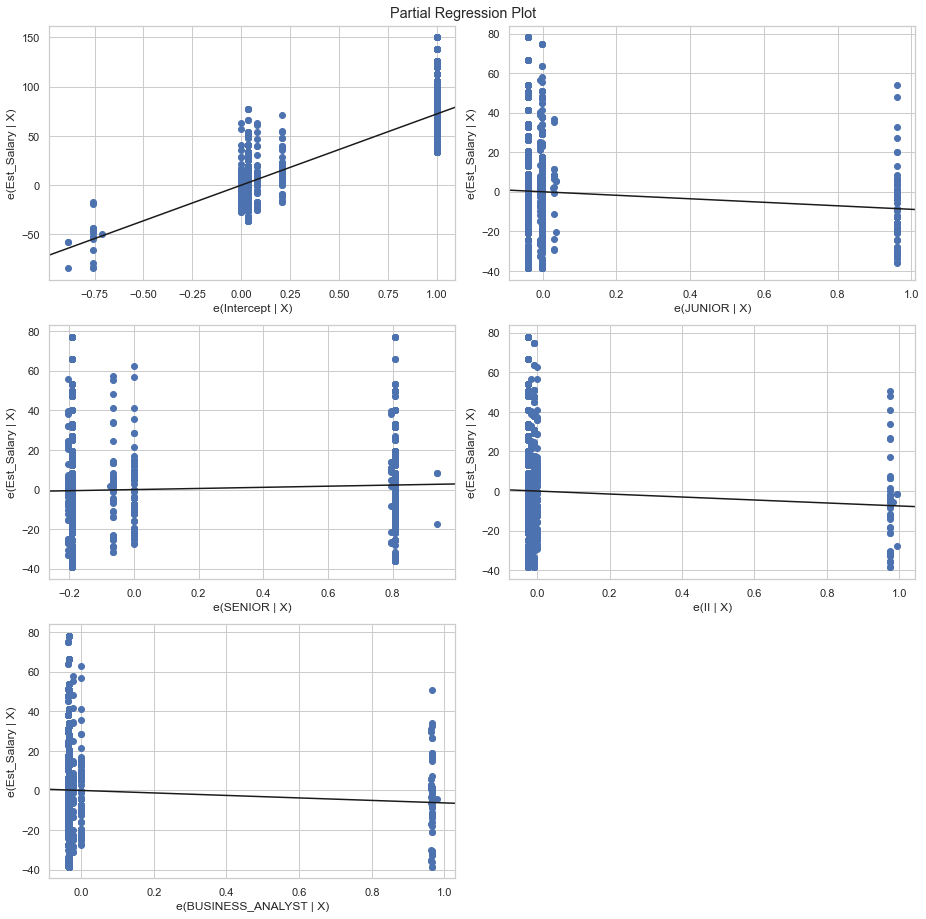

In [108]:
# Plot with scatterplots
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(titleMod_final,fig=fig)
fig.tight_layout(pad=1.0)
# Sorry somebody tell me how to remove that "Partial Regression Plot"

### Correlation: Job Description vs Salary

In [109]:
text_Analysis['Job_Desc2'] = text_Analysis['Job Description'].replace('[^A-Za-z0-9]+', ' ',regex=True)

In [110]:
text_Analysis['Job_Desc2'] = text_Analysis['Job_Desc2'].str.upper().replace(
    ['COMPUTER SCIENCE','ENGINEERING DEGREE',' MS ','BUSINESS ANALYTICS','SCRUM MASTER','MACHINE LEARNING',' ML ','POWER BI','ARTIFICIAL INTELLIGENCE',' AI ','ALGORITHMS','DEEP LEARNING','NEURAL NETWORK','NATURAL LANGUAGE PROCESSING','DECISION TREE','CLUSTERING','PL SQL'],
    ['COMPUTER_SCIENCE','ENGINEERING_DEGREE',' MASTER ','BUSINESS_ANALYTICS','SCRUM_MASTER','MACHINE_LEARNING',' MACHINE_LEARNING ','POWER_BI','ARTIFICIAL_INTELLIGENCE',' ARTIFICIAL_INTELLIGENCE ','ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK','NATURAL_LANGUAGE_PROCESSING','DECISION_TREE','CLUSTER','PLSQL'],regex=True)

In [111]:
# Create a list of big data buzzwords to see if those words in JD would influence the salary
buzzwords = ['COMPUTER_SCIENCE','MASTER','MBA','SQL','PYTHON','R','PHD','BUSINESS_ANALYTICS','SAS','PMP','SCRUM_MASTER','STATISTICS','MATHEMATICS','MACHINE_LEARNING','ARTIFICIAL_INTELLIGENCE','ECONOMICS','TABEAU','AWS','AZURE','POWER_BI','ALGORITHM','DEEP_LEARNING','NEURAL_NETWORK','NATURAL_LANGUAGE_PROCESSING','DECISION_TREE','REGRESSION','CLUSTER','ORACLE','EXCEL','TENSORFLOW','HADOOP','SPARK','NOSQL','SAP','ETL','API','PLSQL','MONGODB','POSTGRESQL','ELASTICSEARCH','REDIS','MYSQL','FIREBASE','SQLITE','CASSANDRA','DYNAMODB','OLTP','OLAP']

In [112]:
# Count the JD keywords.
S2 = text_Analysis['Job_Desc2'].str.split(expand=True).stack().value_counts().reset_index().rename(
    columns={'index':'KW',0:'Count'})
S2 = S2[S2['KW'].isin(buzzwords)].reset_index(drop=True)
# .sort_values('Count',ascending=False)
S2_TOP = S2[S2['Count']>29]
S2_TOP_JD = S2_TOP
S2_TOP_JD['KW'] = S2_TOP_JD['KW'] +'_JD'


<ipython-input-112-d2f3213f649d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S2_TOP_JD['KW'] = S2_TOP_JD['KW'] +'_JD'


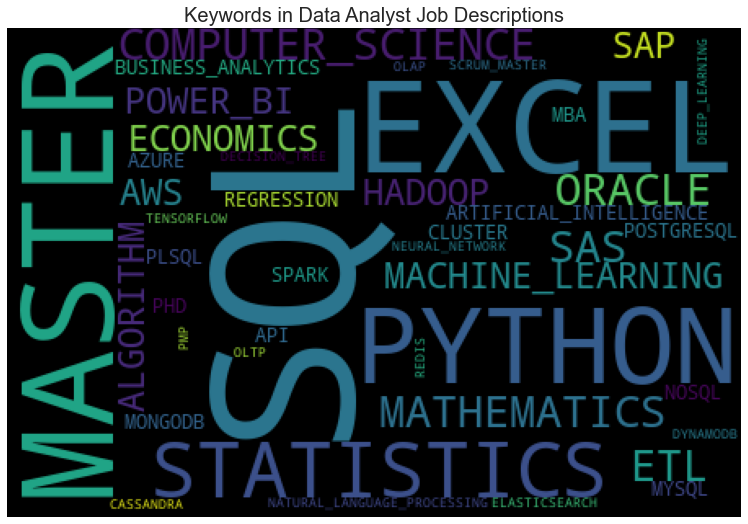

In [113]:
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(S2['KW']))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title("Keywords in Data Analyst Job Descriptions",fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [114]:
# write get_keyword method
def get_keyword(x):
   x_ = x.split(" ")
   keywords = []
   try:
      for word in x_:
         if word + '_JD' in np.asarray(S2_TOP_JD['KW']):
            keywords.append(word + '_JD')
   except:
      return -1

   return keywords

In [115]:
# get keywords from each row
text_Analysis['JDKW'] = text_Analysis['Job_Desc2'].apply(lambda x: get_keyword(x))

In [116]:
# create dummy columns by keywords
kwdummy = pd.get_dummies(text_Analysis['JDKW'].apply(pd.Series).stack()).sum(level=0)
# Since a JD sometimes repeat a keyword, the value may >1
# But what we want to know is whether the appearance of the keyword impact the salary, not frequency
# So values >1 have to be replaced by 1, but there must be a better way than coding like this ↓
kwdummy = kwdummy.replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                         [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

In [117]:
# merge back the dummy columns to the main dataset
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [118]:
# let's see if number of buzzwords contained or how wordy the JD is would have impact.
text_Analysis['JDKWlen']=text_Analysis['JDKW'].str.len()
text_Analysis['JDlen']=text_Analysis['Job Description'].str.len()

In [119]:
# run t-test for top keywords to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests_JD=[]
for word in text_columns:
    if word in set(S2_TOP_JD['KW']):
        ttest2 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_JD.append([word,ttest2])

ttests_JD = pd.DataFrame(ttests_JD,columns=['KW','R'])
ttests_JD['R']=ttests_JD['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_JD['Statistic'],ttests_JD['P-value']=ttests_JD['R'].str.split(', ',1).str
ttests_JD=ttests_JD.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_JD

<ipython-input-119-c3367abeb7fb>:12: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  ttests_JD['Statistic'],ttests_JD['P-value']=ttests_JD['R'].str.split(', ',1).str


,KW,Statistic,P-value
22,PYTHON_JD,3.1454855202979366,0.0016798148989789698
16,MYSQL_JD,3.073582279739166,0.0021404726691396977
18,PHD_JD,2.8709801722675983,0.004130334861569249
26,SAS_JD,-2.5328088192719864,0.01138282238652457
17,ORACLE_JD,2.1291517828797053,0.033350204531353816
13,MASTER_JD,-2.0530455554133247,0.040183761597212785
9,ETL_JD,-1.9599639883423432,0.05012348235884792
14,MATHEMATICS_JD,-1.5597368064751596,0.1189629754350605
10,EXCEL_JD,-1.521605446498184,0.12824873859143365
19,PLSQL_JD,1.3807487956234472,0.16749359079126214


In [120]:
#Selecting keywords with p-value <0.1 into multiple regression model.
ttest_JD_pass1 = list(ttests_JD[ttests_JD['P-value'].astype(float)<0.1]['KW'])
print(*ttest_JD_pass1,sep=' + ')

PYTHON_JD + MYSQL_JD + PHD_JD + SAS_JD + ORACLE_JD + MASTER_JD + ETL_JD


In [121]:
#Run regression and remove variables with p-value >0.05 one by one until all <0.05
JDMod = ols("Est_Salary ~ PYTHON_JD + MYSQL_JD + PHD_JD + SAS_JD",
               data=text_Analysis).fit()
print(JDMod.summary())

                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.371
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           1.06e-06
Time:                        20:36:51   Log-Likelihood:                -10280.
No. Observations:                2248   AIC:                         2.057e+04
Df Residuals:                    2243   BIC:                         2.060e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.3701      0.617    115.606      0.0

this shows SAS analysts get paid lower.. this seems weird given niche nature of skill. If we look closer, its likely that these are for junior/entry level positions and/or at older (avg company age 38) firms in TX, one of the low-paying states. This didnt make to the final models where job location is controlled.

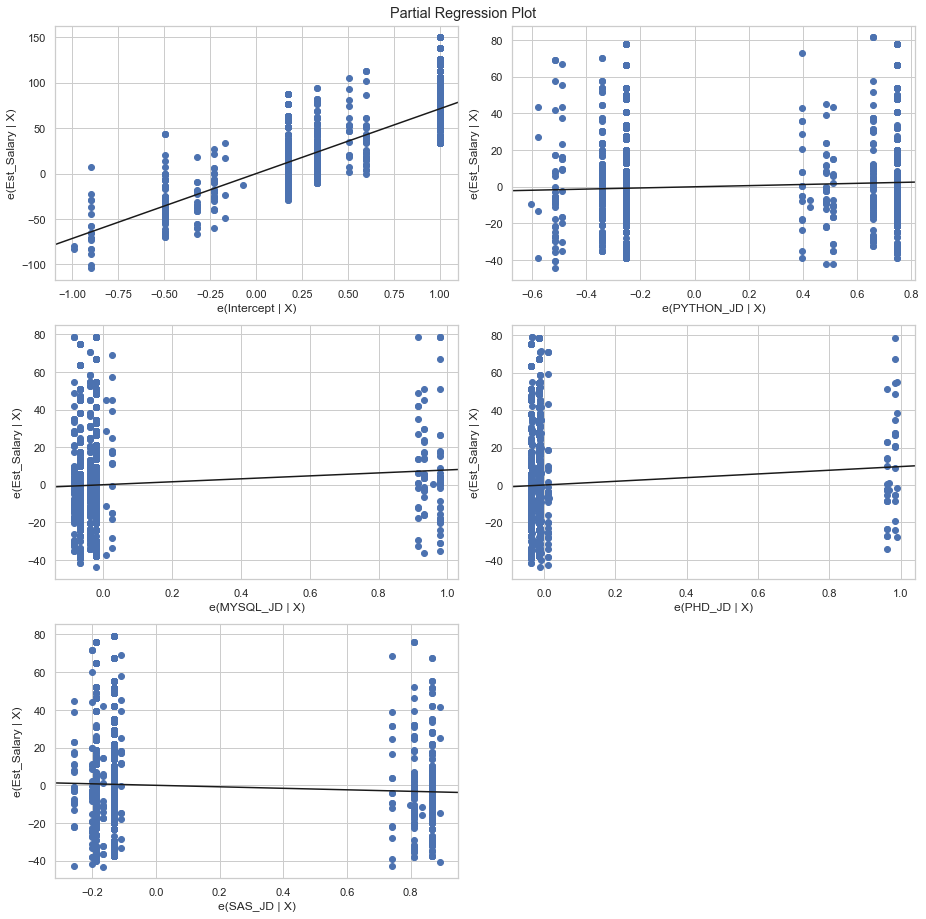

In [122]:
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(JDMod,fig=fig)
fig.tight_layout(pad=1.0)

### Correlation: Job Location (State) vs Salary

In [123]:
# create dummy columns by State
kwdummy = pd.get_dummies(text_Analysis['State'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [124]:
S3 = text_Analysis['State'].value_counts().reset_index().rename(
    columns={'index':'State','State':'Count'})
S3_Top = S3[S3['Count']>29]
S3_Top

,State,Count
0,CA,625
1,TX,394
2,NY,345
3,IL,164
4,PA,113
5,AZ,97
6,CO,95
7,NC,90
8,NJ,86
9,WA,53


In [125]:
#run t-test for top states hring analysts to see their correlation with salaries
text_columns = list(text_Analysis.columns)
ttests_state=[]
for word in text_columns:
    if word in set(S3_Top['State']):
        ttest3 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_state.append([word,ttest3])

ttests_state = pd.DataFrame(ttests_state,columns=['State','R'])
ttests_state['R']=ttests_state['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_state['Statistic'],ttests_state['P-value']=ttests_state['R'].str.split(', ',1).str
ttests_state=ttests_state.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_state

<ipython-input-125-1ba7e1b4cc50>:12: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  ttests_state['Statistic'],ttests_state['P-value']=ttests_state['R'].str.split(', ',1).str


,State,Statistic,P-value
3,IL,3.4871871764328914,0.0004975101658536639
12,WA,-2.3050985706606353,0.021251815764471424
11,VA,-1.982611386890212,0.047532516056225486
4,NC,-1.6508583728758894,0.09890730468575766
2,CO,0.6287405461537323,0.5295828637528285
6,NY,-0.6187817134630991,0.5361229211801275
0,AZ,-0.5741887677034088,0.5658975673027001
5,NJ,0.34616025876923495,0.7292547023228556
10,UT,-8.618507231442898,1.2572853439437861e-17
9,TX,-12.83231537576241,1.9913053850662446e-36


In [126]:
#Selecting states with p-value <0.1 into multiple regression model.
ttest_state_pass = list(ttests_state[ttests_state['P-value'].astype(float)<0.1]['State'])
print(*ttest_state_pass,sep=' + ')

IL + WA + VA + NC + UT + TX + OH + PA + CA


In [127]:
StateMod = ols("Est_Salary ~ IL + UT + TX + OH + PA + CA",
               data=text_Analysis).fit()
print(StateMod.summary())

                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     133.4
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          1.03e-144
Time:                        20:51:56   Log-Likelihood:                -9953.7
No. Observations:                2248   AIC:                         1.992e+04
Df Residuals:                    2241   BIC:                         1.996e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.1131      0.683    101.247      0.0

job location is the most crucial factor to the salary variation - as we see from these results

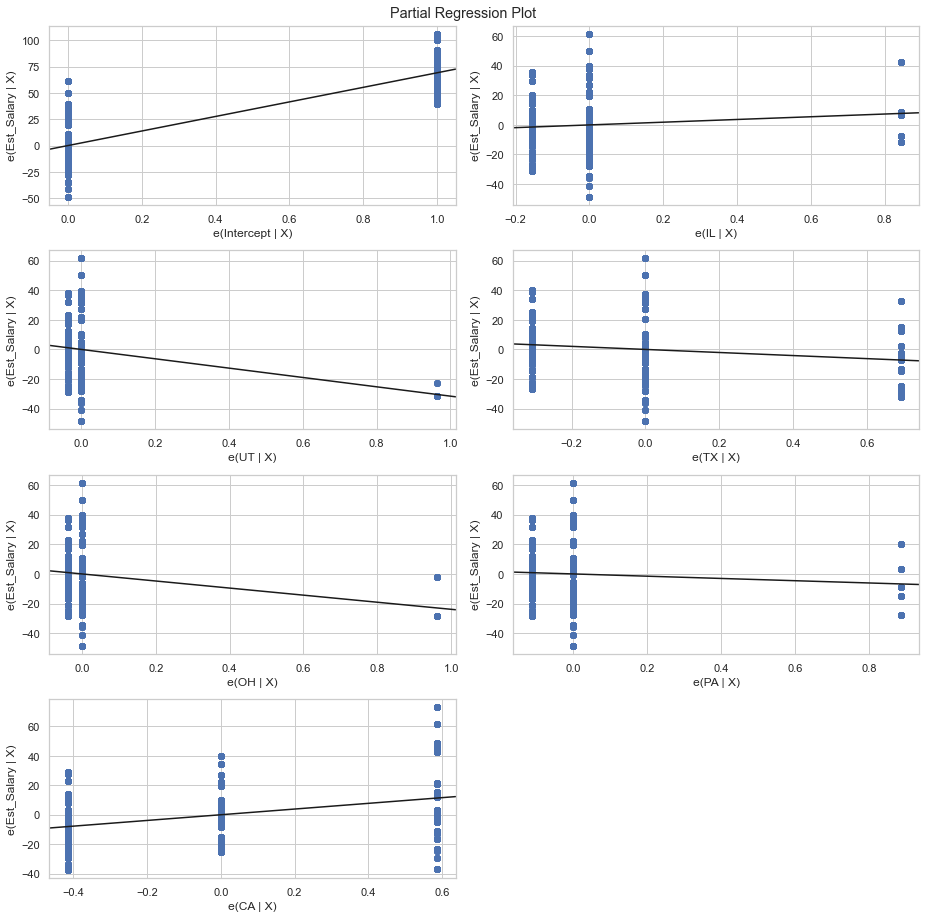

In [128]:
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(StateMod,fig=fig)
fig.tight_layout(pad=1.0)

### Correlation: HQ Location (State) vs Salary

In [129]:
S31 = text_Analysis['HQState'].value_counts().reset_index().rename(
    columns={'index':'HQState','HQState':'Count'}).replace(0,'Unknown_State')
S31_Top = S31[S31['Count']>29]
S31_Top['HQState_HQ'] = [s + '_HQ' for s in S31_Top['HQState']]

<ipython-input-129-78d26e763091>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S31_Top['HQState_HQ'] = [s + '_HQ' for s in S31_Top['HQState']]


In [130]:
# create dummy columns by HQ State
kwdummy = pd.get_dummies(S31_Top['HQState_HQ'].apply(pd.Series).stack()).sum(level=0)
S31_Top2 = S31_Top.merge(kwdummy,left_index=True,right_index=True,how='left').drop(['Count'],axis=1)
text_Analysis = text_Analysis.merge(S31_Top2,on='HQState',how='left').replace(np.nan,0)

In [131]:
text_columns = list(text_Analysis.columns)
ttests_HQstate=[]
for word in text_columns:
    if word in set(S31_Top['HQState_HQ']):
        ttest31 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_HQstate.append([word,ttest31])

ttests_HQstate = pd.DataFrame(ttests_HQstate,columns=['HQState_HQ','R'])
ttests_HQstate['R']=ttests_HQstate['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_HQstate['Statistic'],ttests_HQstate['P-value']=ttests_HQstate['R'].str.split(', ',1).str
ttests_HQstate=ttests_HQstate.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_HQstate

<ipython-input-131-ddfc8274281b>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  ttests_HQstate['Statistic'],ttests_HQstate['P-value']=ttests_HQstate['R'].str.split(', ',1).str


,HQState_HQ,Statistic,P-value
11,PA_HQ,-3.6037640030833424,0.0003204636663066424
10,OH_HQ,-2.9445101765893065,0.003267880764802911
8,NJ_HQ,2.8476438387769254,0.004444462296475872
9,NY_HQ,-2.803084277181425,0.005105106171003899
2,FL_HQ,-2.5318978889016837,0.011412349249393593
14,VA_HQ,-1.6758265887843584,0.09391134990189316
7,NC_HQ,-1.5133419727523838,0.13033351230166712
6,MI_HQ,1.4159906541479472,0.15691689954508944
4,IL_HQ,-1.003654468297828,0.3156533057185176
15,WA_HQ,-0.3794687224420757,0.7043757000332287


In [132]:
ttest_HQstate_pass = list(ttests_HQstate[ttests_HQstate['P-value'].astype(float)<0.1]['HQState_HQ'])
print(*ttest_HQstate_pass,sep=' + ')

PA_HQ + OH_HQ + NJ_HQ + NY_HQ + FL_HQ + VA_HQ + CA_HQ + TX_HQ


In [133]:
HQStateMod = ols("Est_Salary ~ PA_HQ + OH_HQ + NJ_HQ + CA_HQ + TX_HQ",
               data=text_Analysis).fit()
print(HQStateMod.summary())

                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     35.81
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           2.29e-35
Time:                        20:54:04   Log-Likelihood:                -10211.
No. Observations:                2248   AIC:                         2.043e+04
Df Residuals:                    2242   BIC:                         2.047e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.7920      0.626    111.551      0.0

CA, and NJ headquartered companies pay more

## Addnl Variables: Revenue, Size, Sector, Industry and Type of Ownership

In [134]:
#Remove special characters.
text_Analysis['Revenue_USD'] = text_Analysis['Revenue_USD'].replace('[^A-Za-z0-9]+', '_',regex=True).replace('1_5_million','Small_Business').replace('Unknown','RevUnknown')
text_Analysis['Size'] = text_Analysis['Size'].replace('[^A-Za-z0-9]+', '_',regex=True).replace(
    '10000_employees','Large_Firm').replace('Unknown','SizeUnknown')
text_Analysis['Sector'] = text_Analysis['Sector'].replace('[^A-Za-z0-9]+', '_',regex=True).replace(['Government','Unknown'],['GovSec','SectorUnknown'])
text_Analysis['Industry'] = text_Analysis['Industry'].replace('[^A-Za-z0-9]+', '_',regex=True).replace('Unknown','IndUnknown')
text_Analysis['Type of ownership'] = text_Analysis['Type of ownership'].replace('[^A-Za-z0-9]+', '_',regex=True).replace('Unknown','OwnUnknown')

In [135]:
#Rename column name for running regression later.
text_Analysis = text_Analysis.rename(columns={"Easy Apply":"Easy_Apply"})

#### To run multiple regression, will create revenue variables

In [136]:
# create dummy columns by Revenue
kwdummy = pd.get_dummies(text_Analysis['Revenue_USD'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [137]:
S4 = text_Analysis['Revenue_USD'].value_counts().reset_index().rename(
    columns={'index':'Revenue_USD','Revenue_USD':'Count'})
S4_Top = S4[S4['Count']>29]
S4_Top

,Revenue_USD,Count
0,RevUnknown,614
1,100_500_million,218
2,50_100_million,199
3,10_billion,189
4,0,163
5,10_25_million,131
6,2_5_billion,128
7,Small_Business,110
8,25_50_million,109
9,_1_million,93


we will ignore Revenue '0' (these are NaN replaced values)

In [138]:
#run t-test to see the salary differences by companies' revenue.
text_columns = list(text_Analysis.columns)
ttests_rev=[]
for word in text_columns:
    if word in set(S4_Top['Revenue_USD']):
        ttest4 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_rev.append([word,ttest4])

ttests_rev = pd.DataFrame(ttests_rev,columns=['Revenue_USD','R'])
ttests_rev['R']=ttests_rev['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_rev['Statistic'],ttests_rev['P-value']=ttests_rev['R'].str.split(', ',1).str
ttests_rev=ttests_rev.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_rev

<ipython-input-138-f2c00b869e91>:12: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  ttests_rev['Statistic'],ttests_rev['P-value']=ttests_rev['R'].str.split(', ',1).str


,Revenue_USD,Statistic,P-value
8,50_100_million,-2.067317153187129,0.03881858844357256
12,Small_Business,1.7920605706297863,0.07325782185970323
11,RevUnknown,1.7153964943524806,0.08641048104727897
6,25_50_million,1.1404777581168355,0.25420891071519525
4,10_billion,-1.0206924598208893,0.307510095279054
1,0_5_1_billion,-0.8837686030458463,0.3769157267568668
0,0,0.7487984635216214,0.4540570941766361
3,10_25_million,-0.7348420252780572,0.4625124256896209
5,1_2_billion,-0.7282929831891864,0.46651017904869185
10,5_10_million,-0.615018504932283,0.5386048038973348


this seems weird, that medium businesses (50-100 million) pays 2K less than average as small business pays more. this is to be analysed for validity in multiple regression later

In [139]:
#Selecting revenues with p-value <0.1 into multiple regression model.
ttest_rev_pass = list(ttests_rev[ttests_rev['P-value'].astype(float)<0.1]['Revenue_USD'])
print(*ttest_rev_pass,sep=' + ')

50_100_million + Small_Business + RevUnknown


#### To run multiple regression, will create size variables

In [140]:
kwdummy = pd.get_dummies(text_Analysis['Size'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [141]:
S5 = text_Analysis['Size'].value_counts().reset_index().rename(
    columns={'index':'Size','Size':'Count'})
S5_Top = S5[S5['Count']>29]
S5_Top

,Size,Count
0,51_to_200_employees,419
1,Large_Firm,374
2,1001_to_5000_employees,348
3,1_to_50_employees,346
4,201_to_500_employees,248
5,501_to_1000_employees,211
6,0,163
7,5001_to_10000_employees,97
8,SizeUnknown,42


'0' are NaN values replaced for making dummy columns, to be ignored

In [142]:
text_columns = list(text_Analysis.columns)
ttests_size=[]
for word in text_columns:
    if word in set(S5_Top['Size']):
        ttest5 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_size.append([word,ttest5])

ttests_size = pd.DataFrame(ttests_size,columns=['Size','R'])
ttests_size['R']=ttests_size['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_size['Statistic'],ttests_size['P-value']=ttests_size['R'].str.split(', ',1).str
ttests_size=ttests_size.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_size

<ipython-input-142-9a4ae35ab2cf>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  ttests_size['Statistic'],ttests_size['P-value']=ttests_size['R'].str.split(', ',1).str


,Size,Statistic,P-value
6,Large_Firm,-1.9996311944650396,0.04566035288352724
3,5001_to_10000_employees,0.8807204375971571,0.37856338271610757
0,1001_to_5000_employees,0.630499072016383,0.5284322542135438
2,201_to_500_employees,-0.6231434207771377,0.5332535472070133
1,1_to_50_employees,0.5398365152487532,0.589363298961973
5,51_to_200_employees,0.39500587582528507,0.6928760604548097
7,SizeUnknown,0.12736017744573036,0.898666734369518
4,501_to_1000_employees,-0.09517249730174987,0.9241863047596062


p-value indicates that it is statistically significant that larger firms seem to pay 2K less than average sized companies

In [143]:
ttest_size_pass = list(ttests_size[ttests_size['P-value'].astype(float)<0.1]['Size'])
print(*ttest_size_pass,sep=' + ')

Large_Firm


#### To run multiple regression, will create sector variables

In [144]:
kwdummy = pd.get_dummies(text_Analysis['Sector'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [145]:
S6 = text_Analysis['Sector'].value_counts().reset_index().rename(
    columns={'index':'Sector','Sector':'Count'})
S6_Top = S6[S6['Count']>29]
S6_Top

,Sector,Count
0,Information_Technology,570
1,Business_Services,521
2,0,352
3,Finance,169
4,Health_Care,151
5,Education,52
6,Insurance,51
7,Accounting_Legal,43
8,Media,42
9,Manufacturing,40


In [146]:
text_columns = list(text_Analysis.columns)
ttests_sec=[]
for word in text_columns:
    if word in set(S6_Top['Sector']):
        ttest6 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_sec.append([word,ttest6])

ttests_sec = pd.DataFrame(ttests_sec,columns=['Sector','R'])
ttests_sec['R']=ttests_sec['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_sec['Statistic'],ttests_sec['P-value']=ttests_sec['R'].str.split(', ',1).str
ttests_sec=ttests_sec.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_sec

<ipython-input-146-b8d294e055ea>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  ttests_sec['Statistic'],ttests_sec['P-value']=ttests_sec['R'].str.split(', ',1).str


,Sector,Statistic,P-value
2,Biotech_Pharmaceuticals,2.609814640539972,0.009119299299076195
5,Finance,-2.5739778621517253,0.010117235084272815
8,Information_Technology,2.474371774473128,0.013420443361020702
6,GovSec,-2.003491440722664,0.04524449027957346
12,Retail,-1.4356428089942357,0.15124325511231285
11,Media,-1.013843460043587,0.31076665658090963
1,Accounting_Legal,0.8651283135577105,0.3870607584609026
4,Education,-0.7934546030374406,0.4275968223954776
9,Insurance,-0.5752324092567795,0.5651917466545469
0,0,0.5340640495804618,0.5933500751606593


Biotech, Pharma and IT are the highest paying sectors ; Fiance and Govts pay less

In [147]:
ttest_sec_pass = list(ttests_sec[ttests_sec['P-value'].astype(float)<0.1]['Sector'])
print(*ttest_sec_pass,sep=' + ')

Biotech_Pharmaceuticals + Finance + Information_Technology + GovSec


#### To run multiple regression, will create IT Industries variables

i found out later that only IT is statistically signifcant in the final regression model, so dig deeper into the subcategory "industry" under the IT sector

In [148]:
kwdummy = pd.get_dummies(text_Analysis[text_Analysis['Sector']=='Information_Technology']['Industry'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [149]:
S7 = text_Analysis[text_Analysis['Sector']=='Information_Technology']['Industry'].value_counts().reset_index().rename(
    columns={'index':'Industry','Industry':'Count'})
S7_Top = S7[S7['Count']>29]
S7_Top

,Industry,Count
0,IT_Services,325
1,Computer_Hardware_Software,111
2,Enterprise_Software_Network_Solutions,69
3,Internet,65


In [150]:
text_columns = list(text_Analysis.columns)
ttests_ind=[]
for word in text_columns:
    if word in set(S7_Top['Industry']):
        ttest7 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_ind.append([word,ttest7])

ttests_ind = pd.DataFrame(ttests_ind,columns=['Industry','R'])
ttests_ind['R']=ttests_ind['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_ind['Statistic'],ttests_ind['P-value']=ttests_ind['R'].str.split(', ',1).str
ttests_ind=ttests_ind.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_ind

<ipython-input-150-502f5f69eabb>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  ttests_ind['Statistic'],ttests_ind['P-value']=ttests_ind['R'].str.split(', ',1).str


,Industry,Statistic,P-value
3,Internet,2.6110371303049753,0.009086864742848826
0,Computer_Hardware_Software,2.5260073048249203,0.011604934226911195
1,Enterprise_Software_Network_Solutions,1.8556879665956705,0.06362895900206361
2,IT_Services,-0.6489249573131813,0.5164532282392558


most industries in IT sector pay more

In [151]:
ttest_ind_pass = list(ttests_ind[ttests_ind['P-value'].astype(float)<0.1]['Industry'])
print(*ttest_ind_pass,sep=' + ')

Internet + Computer_Hardware_Software + Enterprise_Software_Network_Solutions


#### To run multiple regression, will create Ownership variables

In [152]:
kwdummy = pd.get_dummies(text_Analysis['Type of ownership'].apply(pd.Series).stack()).sum(level=0)
text_Analysis = text_Analysis.merge(kwdummy,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [153]:
S8 = text_Analysis['Type of ownership'].value_counts().reset_index().rename(
    columns={'index':'Type_of_ownership','Type of ownership':'Count'})
S8_Top = S8[S8['Count']>29]
S8_Top

,Type_of_ownership,Count
0,Company_Private,1268
1,Company_Public,452
2,0,163
3,Nonprofit_Organization,124
4,Subsidiary_or_Business_Segment,89
5,Government,37
6,College_University,34


In [154]:
text_columns = list(text_Analysis.columns)
ttests_own=[]
for word in text_columns:
    if word in set(S8_Top['Type_of_ownership']):
        ttest8 = stats.ttest_ind(text_Analysis[text_Analysis[word]>0]['Est_Salary'],
                                 text_Analysis[text_Analysis[word]==0]['Est_Salary'])
        ttests_own.append([word,ttest8])

ttests_own = pd.DataFrame(ttests_own,columns=['Type_of_ownership','R'])
ttests_own['R']=ttests_own['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttests_own['Statistic'],ttests_own['P-value']=ttests_own['R'].str.split(', ',1).str
ttests_own=ttests_own.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_own

<ipython-input-154-0dd02120d9ba>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  ttests_own['Statistic'],ttests_own['P-value']=ttests_own['R'].str.split(', ',1).str


,Type_of_ownership,Statistic,P-value
3,Government,-3.0701964982979657,0.0021647848363638695
4,Nonprofit_Organization,-1.703857781949545,0.0885459857780986
1,Company_Private,0.8848239369765997,0.37634630926402446
5,Subsidiary_or_Business_Segment,-0.7078924103974973,0.47908552437246077
2,Company_Public,0.5699318976535838,0.5687808905981325
0,College_University,0.2992278900437682,0.7647938555194423


NGOs look like paying less

In [155]:
ttest_own_pass = list(ttests_own[ttests_own['P-value'].astype(float)<0.1]['Type_of_ownership'])
print(*ttest_own_pass,sep=' + ')

Government + Nonprofit_Organization


### Final Regression Model

In [ ]:
before considering interaction terms , combined regression model

In [156]:
ModC = ols("Est_Salary ~ JUNIOR + IL + UT + TX + OH + PA + CA + Small_Business + Information_Technology + NJ_HQ + MYSQL_JD",
               data=text_Analysis).fit()
# Rating, Years_Founded, Easy_Apply, PHD, Sector, Size, Type_of_ownership not significant
print(ModC.summary())

                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     77.05
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          2.72e-147
Time:                        21:18:06   Log-Likelihood:                -9935.7
No. Observations:                2248   AIC:                         1.990e+04
Df Residuals:                    2236   BIC:                         1.996e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 68

In [157]:
# Trying different interaction terms.
text_Analysis['CA_SB']=text_Analysis['CA']*text_Analysis['Small_Business']
text_Analysis['CA_IT']=text_Analysis['CA']*text_Analysis['Information_Technology']
text_Analysis['IT_SB']=text_Analysis['Information_Technology']*text_Analysis['Small_Business']
text_Analysis['CA_IT_SB']=text_Analysis['Information_Technology']*text_Analysis['Small_Business']*text_Analysis['CA']
text_Analysis['CA_NJ_HQ']=text_Analysis['CA']*text_Analysis['NJ_HQ']
text_Analysis['SB_NJ_HQ']=text_Analysis['Small_Business']*text_Analysis['NJ_HQ']
text_Analysis['IT_NJ_HQ']=text_Analysis['Information_Technology']*text_Analysis['NJ_HQ']
text_Analysis['CA_PHD']=text_Analysis['CA']*text_Analysis['PHD_JD']
text_Analysis['CA_CA_HQ']=text_Analysis['CA']*text_Analysis['CA_HQ']

In [158]:
ModS = ols("Est_Salary ~ CA + CA_PHD + PHD_JD",
               data=text_Analysis).fit()
print(ModS.summary())

                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     171.1
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          6.66e-100
Time:                        21:18:29   Log-Likelihood:                -10065.
No. Observations:                2248   AIC:                         2.014e+04
Df Residuals:                    2244   BIC:                         2.016e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.8195      0.533    123.553      0.0

In [159]:
# Final model considering interaction terms.
ModC = ols("Est_Salary ~ JUNIOR + MYSQL_JD + IL + UT + TX + OH + PA + CA + Small_Business + Information_Technology + CA_IT + NJ_HQ",
               data=text_Analysis).fit()
# Rating, Years_Founded, Easy_Apply, PHD, Sector, Size, Type_of_ownership not significant
print(ModC.summary())

                            OLS Regression Results                            
Dep. Variable:             Est_Salary   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     72.68
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          3.32e-150
Time:                        21:18:39   Log-Likelihood:                -9926.7
No. Observations:                2248   AIC:                         1.988e+04
Df Residuals:                    2235   BIC:                         1.995e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 68

* job location is the most important factor behind salary variations

* IT companies don't seem to be paying more always, but CA IT firms definitely do.

* business with 1 to 5 million revenue USD tend to pay more

* higher pay for NJ headquartered companies

* MYSQL experience analysts have higher pay

* PHD didn't make it to the final model, nor did the interaction term "CA_PHD"

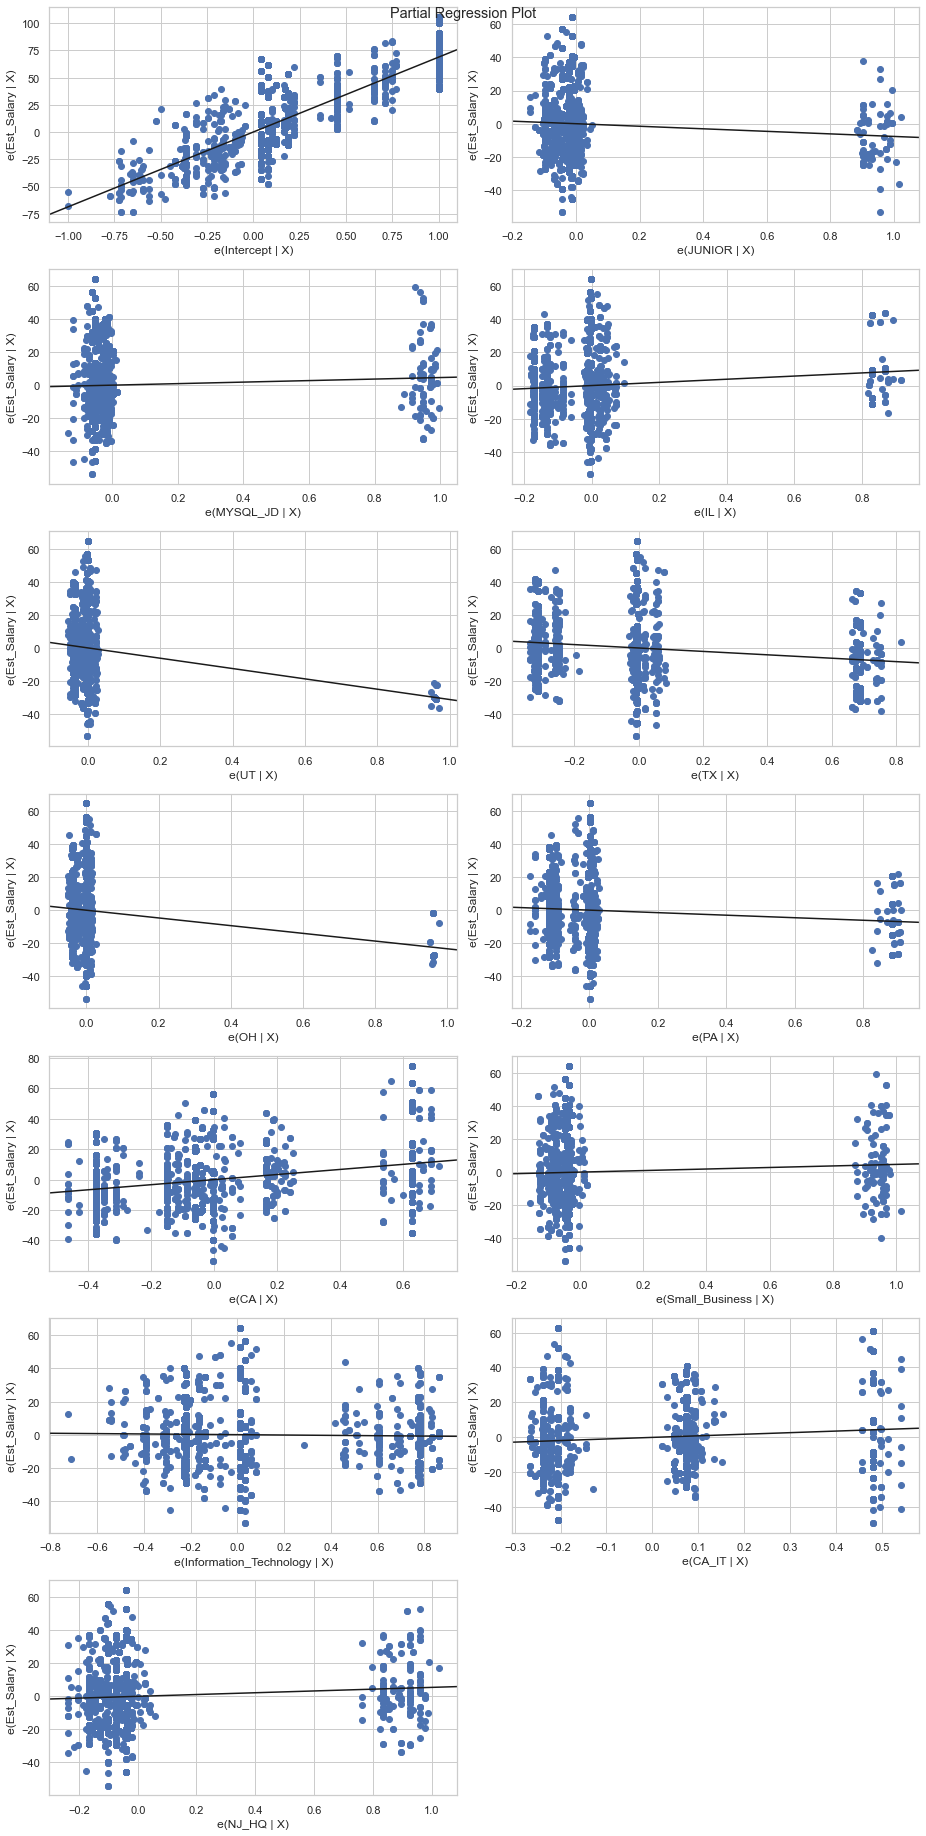

In [160]:
fig = plt.figure(figsize=(13, 26))
fig = sm.graphics.plot_partregress_grid(ModC,fig=fig)
fig.tight_layout(pad=1.0)

### California Salary Distribution

In [161]:
# create a separate dataset for CA
data_CA = data[data['State']=='CA']

In [162]:
pd.set_option('display.max_columns', None)
data_CA.describe(include='all')

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary,Est_Salary,Years_Founded,City,State,HQCity,HQState,Revenue_USD
count,626.000000,626,626,547.000000,626,626,579,582,448.000000,582,519,519,582,164,27,626.000000,626.000000,626.000000,448.000000,626,626,579,579,582
unique,NaN,373,626,NaN,474,74,179,8,NaN,12,54,20,13,102,1,NaN,NaN,NaN,NaN,74,1,178,40,13
top,NaN,Data Analyst,Job Description\nThe Data Analyst will need to...,NaN,"Staffigo Technical Services, LLC","San Francisco, CA","San Francisco, CA",51 to 200 employees,NaN,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,"Google, Microsoft, Samsung Electronics",True,NaN,NaN,NaN,NaN,San Francisco,CA,San Francisco,CA,Unknown
freq,NaN,121,1,NaN,12,119,56,129,NaN,361,80,185,218,10,27,NaN,NaN,NaN,NaN,119,626,56,355,218
mean,1335.696486,NaN,NaN,3.849909,NaN,NaN,NaN,NaN,1988.792411,NaN,NaN,NaN,NaN,NaN,NaN,66.311502,110.552716,88.432109,31.207589,NaN,NaN,NaN,NaN,NaN
std,559.938274,NaN,NaN,0.601810,NaN,NaN,NaN,NaN,34.319713,NaN,NaN,NaN,NaN,NaN,NaN,22.180649,35.731146,28.197301,34.319713,NaN,NaN,NaN,NaN,NaN
min,454.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1682.000000,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,45.000000,40.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,666.250000,NaN,NaN,3.450000,NaN,NaN,NaN,NaN,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,86.000000,72.000000,11.000000,NaN,NaN,NaN,NaN,NaN
50%,1506.500000,NaN,NaN,3.900000,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,104.000000,80.500000,20.000000,NaN,NaN,NaN,NaN,NaN
75%,1915.750000,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,127.000000,99.000000,38.000000,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn

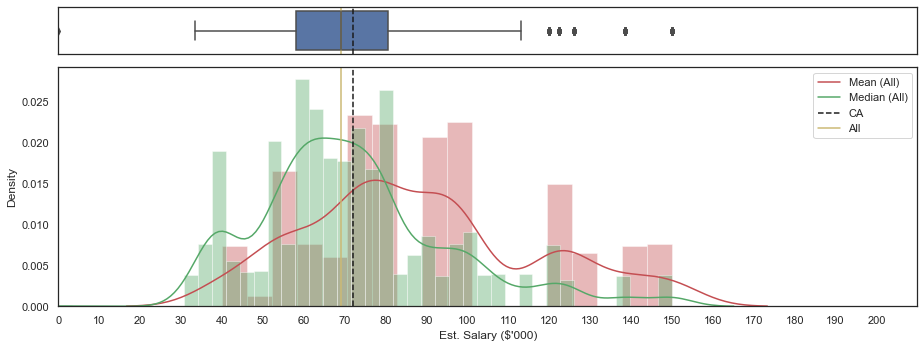

In [163]:
sns.set(style='white')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(13,5))
mean=data['Est_Salary'].mean()
median=data['Est_Salary'].median()

bph = sns.boxplot(data['Est_Salary'], ax=ax_box).set(xlabel="")
ax_box.axvline(mean, color='k', linestyle='--')
ax_box.axvline(median, color='y', linestyle='-')

dp1 = sns.distplot(data_CA['Est_Salary'],ax=ax_hist, color="r").set(xlabel="Est. Salary ($'000)")
dp2 = sns.distplot(data['Est_Salary'],ax=ax_hist, color="g").set(xlabel="Est. Salary ($'000)")
ax_hist.axvline(mean, color='k', linestyle='--')
ax_hist.axvline(median, color='y', linestyle='-')

plt.legend({'Mean (All)':mean,'Median (All)':median,'CA':data_CA['Est_Salary'],'All':data['Est_Salary']})
plt.xlim(0,210)
plt.xticks(np.arange(0,210,step=10))
plt.tight_layout() #Adjust the padding between and around subplots
plt.show()

when compared to US entirely, salary distribution for CA shifts to right, indicating higher salary levels for CA

## [Heatmap] California vs ALL - Number, Size and Salary of Hiring Firms

In [164]:
# Create a table for heatmap of number of companies with different sizes and revenues
Firm_Size = data.pivot_table(columns="Size",index="Revenue_USD",values="Company Name",aggfunc=pd.Series.nunique).reset_index()
Firm_Size = Firm_Size[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size = Firm_Size.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size = Firm_Size.set_index('Revenue_USD').replace(np.nan,0)

# Create a table for heatmap of number of companies with different sizes and revenues in CA
Firm_Size_CA = data_CA.pivot_table(columns="Size",index="Revenue_USD",values="Company Name",aggfunc=pd.Series.nunique).reset_index()
Firm_Size_CA = Firm_Size_CA[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size_CA = Firm_Size_CA.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size_CA = Firm_Size_CA.set_index('Revenue_USD').replace(np.nan,0)

# Create table for heatmap of salaries by companies with different sizes and revenues
Firm_Size_Sal = data.pivot_table(columns="Size",index="Revenue_USD",values="Est_Salary",aggfunc=np.mean).reset_index()
Firm_Size_Sal = Firm_Size_Sal[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size_Sal = Firm_Size_Sal.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size_Sal = Firm_Size_Sal.set_index('Revenue_USD').replace(np.nan,0)

# Create table for heatmap of salaries by companies with different sizes and revenues in CA
Firm_Size_CA_Sal = data_CA.pivot_table(columns="Size",index="Revenue_USD",values="Est_Salary",aggfunc=np.mean).reset_index()
Firm_Size_CA_Sal = Firm_Size_CA_Sal[['Revenue_USD','1 to 50 employees','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']]
Firm_Size_CA_Sal = Firm_Size_CA_Sal.reindex([11,2,9,4,7,10,5,0,1,6,8,3,12])
Firm_Size_CA_Sal = Firm_Size_CA_Sal.set_index('Revenue_USD').replace(np.nan,0)

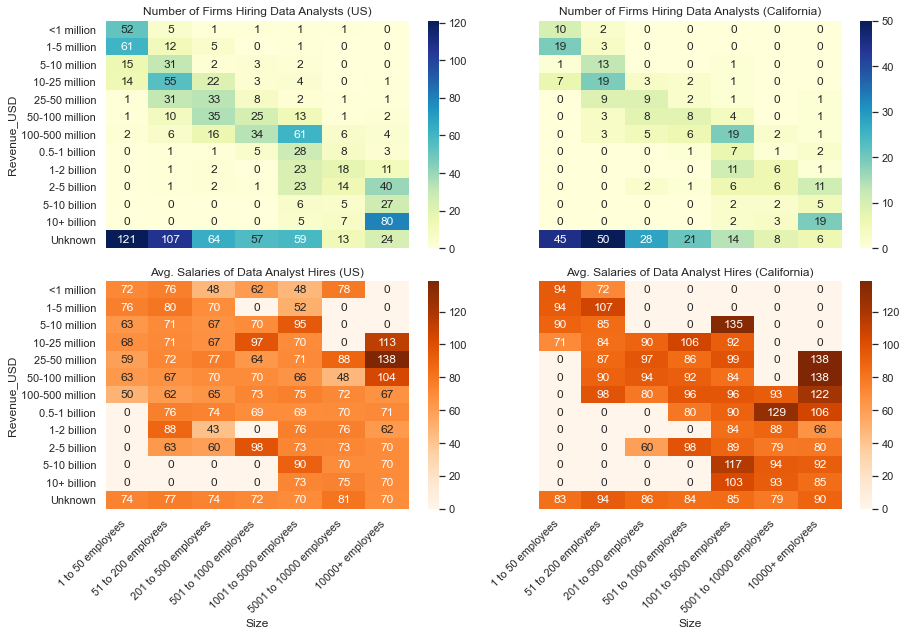

In [165]:
f, axs = plt.subplots(nrows=2,ncols=2, sharey=True,sharex=True, figsize=(13,9))

fs = sns.heatmap(Firm_Size,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="YlGnBu", ax=axs[0,0]).set(title="Number of Firms Hiring Data Analysts (US)",xlabel="")
fsc = sns.heatmap(Firm_Size_CA,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="YlGnBu", ax=axs[0,1]).set(title="Number of Firms Hiring Data Analysts (California)",xlabel="",ylabel="")
fss = sns.heatmap(Firm_Size_Sal,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="Oranges",ax=axs[1,0]).set(title="Avg. Salaries of Data Analyst Hires (US)")
fscs = sns.heatmap(Firm_Size_CA_Sal,annot=True,fmt='.0f',annot_kws={"size": 12},cmap="Oranges",ax=axs[1,1]).set(title="Avg. Salaries of Data Analyst Hires (California)",ylabel="")

plt.setp([a.get_xticklabels() for a in axs[1,:]],rotation=45,ha='right')
plt.tight_layout()
plt.show()

* Big firms (10k+ employess and USD10B+ revenues) do the bulk of analyst hiring, but don't necessarily pay more

* Revenue "Unknown" firms have high demand amongst non-public fiannce firms. these firms pay similar or higher salaries than big firms

* medium-large firms (1k-5k employees and USD100M-USD500M revenues), small businesses (<50 employees and <USD5M revenues) and small-medium businesses (51-200 employees , unknown revenues) tend to pay more

* CA firms pay more

#### Who are those high-paying medium-large businesses in CA?

In [166]:
ca_sal_by_firm = data_CA.groupby('Company Name')[['Est_Salary']].mean().reset_index()

In [167]:
MLHighPay = data_CA[(data_CA['Revenue_USD']=='100-500 million')&(
    data_CA['Size']=='1001 to 5000 employees')]['Company Name'].value_counts().reset_index().rename(
    columns={'index':'Company Name','Company Name':'Hires'})

In [168]:
MLHighPay = MLHighPay.merge(ca_sal_by_firm, on='Company Name',how='left')
MLHighPay = MLHighPay.merge(data_CA[['Company Name','Rating','Headquarters','Type of ownership','Industry','Sector','Years_Founded','Competitors']], on='Company Name',how='left')
MLHighPay = MLHighPay.drop_duplicates().reset_index(drop=True)
MLHighPay

,Company Name,Hires,Est_Salary,Rating,Headquarters,Type of ownership,Industry,Sector,Years_Founded,Competitors
0,ICONMA,3,122.500000,3.6,"Troy, MI",Company - Private,Staffing & Outsourcing,Business Services,20.0,Experis
1,Ascent,3,82.333333,4.6,"Concord, CA",Company - Private,Staffing & Outsourcing,Business Services,20.0,NaN
2,The Ascent Services Group,2,60.500000,4.6,"Concord, CA",Company - Private,Staffing & Outsourcing,Business Services,20.0,NaN
3,Stamps.com,1,79.000000,3.1,"El Segundo, CA",Company - Public,Computer Hardware & Software,Information Technology,24.0,"Pitney Bowes, US Postal Service, Envelope Mana..."
4,Exact Sciences Corporation,1,120.000000,4.0,"Madison, WI",Company - Public,Health Care Services & Hospitals,Health Care,25.0,NaN
5,Alteryx,1,150.000000,3.3,"Irvine, CA",Company - Public,Enterprise Software & Network Solutions,Information Technology,23.0,NaN
6,"U.S. Auto Parts Network, Inc.",1,54.000000,3.4,"Carson, CA",Company - Public,Automotive Parts & Accessories Stores,Retail,25.0,"AutoZone, eBay, Advance Auto Parts"
7,Rose International,1,99.000000,4.5,"Chesterfield, MO",Company - Private,Staffing & Outsourcing,Business Services,27.0,NaN
8,Sycuan Casino,1,92.000000,3.3,"El Cajon, CA",Company - Private,Gambling,"Arts, Entertainment & Recreation",37.0,"Viejas Casino, Barona Casino, Pechanga Resort ..."
9,Technosoft Corporation,1,98.000000,3.8,"Southfield, MI",Company - Private,IT Services,Information Technology,24.0,NaN


In [169]:
MLHighPay.describe(include='all')

,Company Name,Hires,Est_Salary,Rating,Headquarters,Type of ownership,Industry,Sector,Years_Founded,Competitors
count,19,19.000000,19.000000,19.000000,19,19,19,19,19.000000,11
unique,19,NaN,NaN,NaN,16,2,8,6,NaN,9
top,Rose International,NaN,NaN,NaN,"Troy, MI",Company - Private,Staffing & Outsourcing,Business Services,NaN,Experis
freq,1,NaN,NaN,NaN,3,13,9,9,NaN,3
mean,NaN,1.263158,97.096491,3.689474,NaN,NaN,NaN,NaN,22.578947,NaN
std,NaN,0.653376,31.889727,0.459341,NaN,NaN,NaN,NaN,6.103877,NaN
min,NaN,1.000000,54.000000,3.100000,NaN,NaN,NaN,NaN,8.000000,NaN
25%,NaN,1.000000,75.500000,3.350000,NaN,NaN,NaN,NaN,20.000000,NaN
50%,NaN,1.000000,98.000000,3.600000,NaN,NaN,NaN,NaN,23.000000,NaN
75%,NaN,1.000000,121.250000,3.850000,NaN,NaN,NaN,NaN,25.000000,NaN


##### characteristics of these high-paying medium-large companies in CA ?

* most are private firms (1k-5k employees & USD100M-500M revenues)

* 50% of these are staffing firms or in outsourcing business

* avg hires 1.3; avg rating 3.7 (ttl avg 3.1); avg company age 22.6 (ttl avg 40)

##### Who are those high-paying small businesses in CA ?

In [170]:
smallHighPay = data_CA[((data_CA['Revenue_USD']=='<1 million')|(
    data_CA['Revenue_USD']=='1-5 million'))&(
    data_CA['Size']=='1 to 50 employees')]['Company Name'].value_counts().reset_index().rename(
    columns={'index':'Company Name','Company Name':'Hires'})

In [171]:
smallHighPay = smallHighPay.merge(ca_sal_by_firm, on='Company Name',how='left')
smallHighPay = smallHighPay.merge(data_CA[['Company Name','Rating','Headquarters','Type of ownership','Industry','Sector','Years_Founded','Competitors']], on='Company Name',how='left')
smallHighPay = smallHighPay.drop_duplicates().reset_index(drop=True)
smallHighPay

,Company Name,Hires,Est_Salary,Rating,Headquarters,Type of ownership,Industry,Sector,Years_Founded,Competitors
0,Lorven Technologies Inc,7,93.000000,4.0,"Plainsboro, NJ",Company - Private,Accounting,Accounting & Legal,NaN,NaN
1,Kaygen Inc.,3,103.833333,3.9,"Irvine, CA",Company - Private,Consulting,Business Services,NaN,NaN
2,Web Shop Manager,2,92.000000,4.2,"San Diego, CA",Company - Private,Computer Hardware & Software,Information Technology,20.0,NaN
3,Introlligent Inc.,1,72.000000,3.7,"Elk Grove, CA",Company - Private,Advertising & Marketing,Business Services,NaN,NaN
4,DT Professional Services,1,122.500000,NaN,"Canoga Park, CA",Company - Public,NaN,NaN,7.0,NaN
5,Georgia IT Inc.,1,73.000000,5.0,"Alpharetta, GA",Company - Private,NaN,NaN,NaN,NaN
6,HITRECORD,1,79.000000,3.5,"Van Nuys, CA",Company - Private,NaN,NaN,NaN,NaN
7,Anzu Global,1,75.500000,4.8,"Acton, MA",Company - Private,Consulting,Business Services,14.0,NaN
8,TCOE,1,64.000000,3.7,"Springville, CA",School / School District,Preschool & Child Care,Education,NaN,NaN
9,"Prime MSO, LLC.",1,54.000000,4.0,"Dayton, OH",Company - Private,Health Care Services & Hospitals,Health Care,NaN,NaN


In [172]:
smallHighPay.describe(include='all')

,Company Name,Hires,Est_Salary,Rating,Headquarters,Type of ownership,Industry,Sector,Years_Founded,Competitors
count,29,29.000000,29.000000,27.000000,29,29,25,25,12.000000,0
unique,29,NaN,NaN,NaN,24,4,13,7,NaN,0
top,Web Shop Manager,NaN,NaN,NaN,"Alpharetta, GA",Company - Private,Consulting,Information Technology,NaN,NaN
freq,1,NaN,NaN,NaN,4,26,4,9,NaN,NaN
mean,NaN,1.310345,93.614943,4.125926,NaN,NaN,NaN,NaN,13.166667,NaN
std,NaN,1.168132,27.100273,0.679136,NaN,NaN,NaN,NaN,6.644661,NaN
min,NaN,1.000000,40.000000,2.200000,NaN,NaN,NaN,NaN,5.000000,NaN
25%,NaN,1.000000,75.500000,3.700000,NaN,NaN,NaN,NaN,7.000000,NaN
50%,NaN,1.000000,92.500000,4.000000,NaN,NaN,NaN,NaN,12.000000,NaN
75%,NaN,1.000000,120.000000,4.650000,NaN,NaN,NaN,NaN,19.250000,NaN


##### characteristics of these high-paying small business in CA ?

* private companies (<50 employees and <USD5M revenues)

* IT and related industrys, industry and sector is scattered

* avg hire 1.3 , avg rating 4.1 (ttl avg 3.1), avg company age 13.17 (ttl avg 40)

#### Who are those high-paying small-medium businesses in CA ?

In [173]:
SMHighPay = data_CA[(data_CA['Revenue_USD']=='Unknown')&(
    data_CA['Size']=='51 to 200 employees')]['Company Name'].value_counts().reset_index().rename(
    columns={'index':'Company Name','Company Name':'Hires'})

In [174]:
SMHighPay = SMHighPay.merge(ca_sal_by_firm, on='Company Name',how='left')
SMHighPay = SMHighPay.merge(data_CA[['Company Name','Rating','Headquarters','Type of ownership','Industry','Sector','Years_Founded','Competitors']], on='Company Name',how='left')
SMHighPay = SMHighPay.drop_duplicates().reset_index(drop=True)
SMHighPay

,Company Name,Hires,Est_Salary,Rating,Headquarters,Type of ownership,Industry,Sector,Years_Founded,Competitors
0,"Armada Group, Inc.",2,85.0,4.4,"Santa Cruz, CA",Company - Private,IT Services,Information Technology,25.0,"TEKsystems, Akraya, Intelliswift"
1,Parker Institute for Cancer Immunotherapy,2,76.5,NaN,"San Francisco, CA",Nonprofit Organization,Health Fundraising Organizations,Non-Profit,NaN,NaN
2,Adwait Algorithm,2,109.0,4.4,"Houston, TX",Company - Private,IT Services,Information Technology,5.0,NaN
3,Potomac Management,2,95.5,3.5,"Hagerstown, MD",Nonprofit Organization,NaN,NaN,NaN,NaN
4,PlayQ,2,76.0,4.7,"Santa Monica, CA",Company - Private,Video Games,Media,13.0,NaN
5,Quinn Group,1,122.5,5.0,"Taipei, Taiwan",Company - Private,NaN,NaN,NaN,NaN
6,LaunchDarkly,1,80.5,5.0,"Oakland, CA",Company - Private,Enterprise Software & Network Solutions,Information Technology,6.0,NaN
7,Method360,1,98.0,4.7,"San Francisco, CA",Company - Private,IT Services,Information Technology,20.0,"Optimal Solutions Integration, Capgemini"
8,NRC INC,1,122.5,4.0,"Boca Raton, FL",Company - Private,NaN,NaN,NaN,NaN
9,Sayva Solutions,1,99.0,4.8,"La Jolla, CA",Company - Private,Staffing & Outsourcing,Business Services,6.0,NaN


In [175]:
SMHighPay.describe(include='all')

,Company Name,Hires,Est_Salary,Rating,Headquarters,Type of ownership,Industry,Sector,Years_Founded,Competitors
count,50,50.000000,50.000000,41.000000,50,50,37,37,33.000000,5
unique,50,NaN,NaN,NaN,30,6,17,12,NaN,4
top,IT Avalon,NaN,NaN,NaN,"San Francisco, CA",Company - Private,IT Services,Information Technology,NaN,"TEKsystems, Akraya, Intelliswift"
freq,1,NaN,NaN,NaN,12,37,9,17,NaN,2
mean,NaN,1.100000,94.070000,4.214634,NaN,NaN,NaN,NaN,9.909091,NaN
std,NaN,0.303046,26.262608,0.577737,NaN,NaN,NaN,NaN,7.771597,NaN
min,NaN,1.000000,40.000000,2.500000,NaN,NaN,NaN,NaN,3.000000,NaN
25%,NaN,1.000000,79.250000,3.900000,NaN,NaN,NaN,NaN,5.000000,NaN
50%,NaN,1.000000,92.250000,4.400000,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,1.000000,99.000000,4.600000,NaN,NaN,NaN,NaN,12.000000,NaN


##### characteristics of these high-paying small business in CA ?

* private compaies (51-200 employees with unknown revenues)

* 50% are IT related

* avg hires 1.1 ; avg rating 4.2 (hiugher than ttl avg 3.1); avg compamy age 9.9 (ttl avg 40)

#### CA - Hires and Salary Estimates by Revenues

In [176]:
RevCountCA = data_CA.groupby('Revenue_USD')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).reset_index(drop=True)
RevCountCA = RevCountCA.merge(data_CA, on='Revenue_USD',how='left')

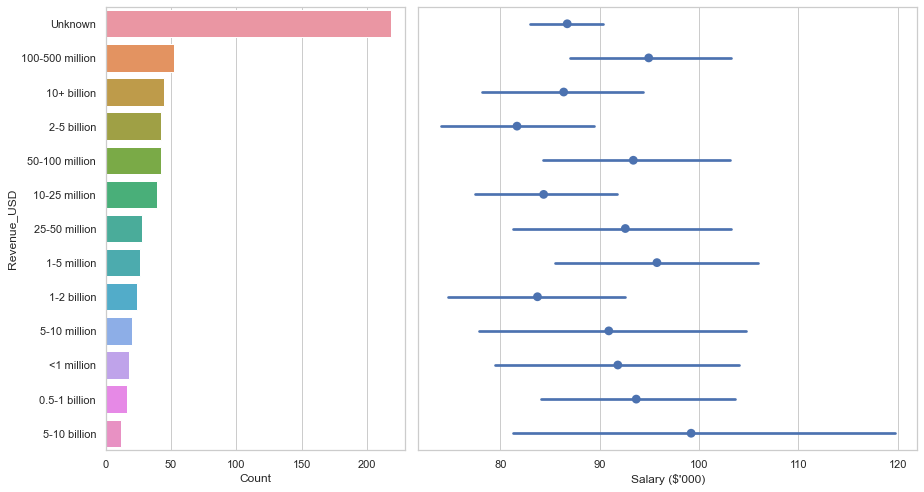

In [177]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Revenue_USD',data=RevCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Revenue_USD',data=RevCountCA, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

* in CA, majority of the analyst hirings are with firms with unknown revenues 

#### CA - Hires and Salary Estimates by Sizes

In [179]:
SizeCountCA = data_CA.groupby('Size')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).reset_index(drop=True)
SizeCountCA = SizeCountCA.merge(data_CA, on='Size',how='left')

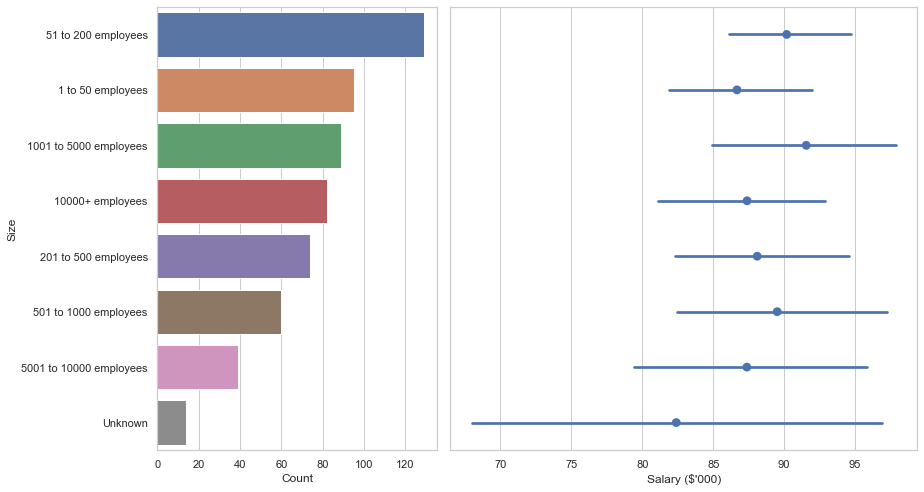

In [180]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Size',data=SizeCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Size',data=SizeCountCA, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

#### CA - Hires and Salary Estimates by Sectors

In [181]:
SecCountCA = data_CA.groupby('Sector')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).head(12).reset_index(drop=True)
SecCountCA = SecCountCA.merge(data_CA, on='Sector',how='left')

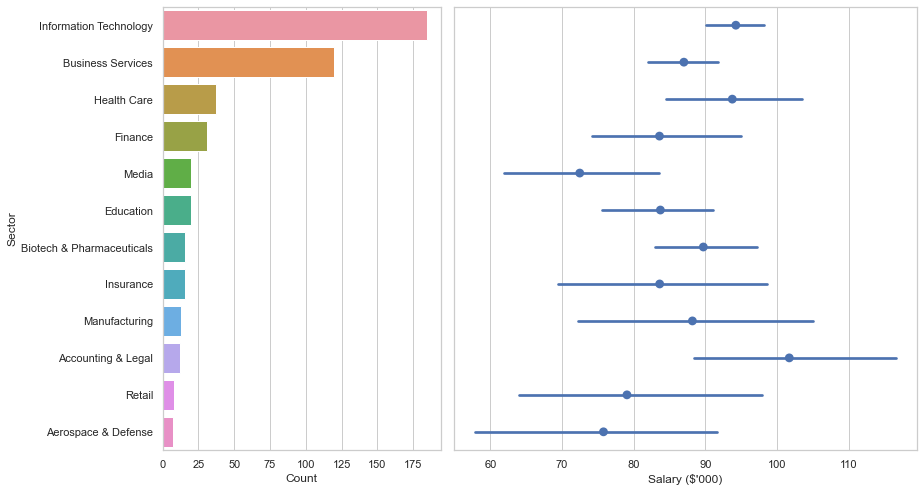

In [182]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Sector',data=SecCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Sector', join=False,data=SecCountCA,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

#### CA - Hires and Salary Estimates by Types of Ownership

In [183]:
OwnCountCA = data_CA.groupby('Type of ownership')[['Job Title']].count().reset_index().rename(columns={'Job Title':'Count'}).sort_values(
    'Count', ascending=False).reset_index(drop=True)
OwnCountCA = OwnCountCA.merge(data_CA, on='Type of ownership',how='left')

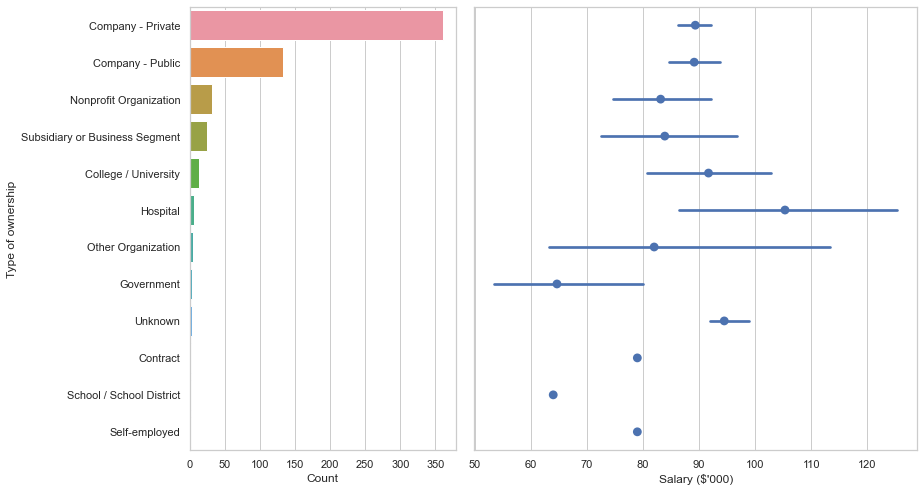

In [184]:
sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))
sns.barplot(x='Count',y='Type of ownership',data=OwnCountCA,ax=ax_bar)
sns.pointplot(x='Est_Salary',y='Type of ownership',data=OwnCountCA, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()